# PROYECTO 
# Diego Valle 
# Carné: 20003022 

## Instalando paquetes
Se instalan a continuación el paquete scikit-learn, seaborn

pip install -U scikit-learn

pip install seaborn

Iniciamos con la carga de los datos, para lo cual debemos llamar a **numpy** y tenerlo en la variable np

In [1]:
import numpy as np

In [4]:
import pandas as pd

In [25]:
X=np.array(np.load('proyecto_training_data.npy'))

Se realiza el slicing con Numpy para crear dos datasets

In [35]:
divideDatos=(int(X.size*0.8))
print("Se dividirá en 80% y 20% de los datos, quedando ")
print(divideDatos, " datos en entrena y ")
print((X.size-divideDatos), " para validar")
entrena, valida=X[:7007,:], X[7008:,:]

Se dividirá en 80% y 20% de los datos, quedando 
7008  datos en entrena y 
1752  para validar


Colocando datos en Dataframe de Pandas

In [237]:
EntrenaPandas=pd.DataFrame(entrena,columns=['SalesPrice','OverallQual','1stFlrSF','TotRmsAbvGrd','YearBuilt','LotFrontage'])
EntrenaPandas.astype({"SalesPrice": float, "OverallQual":int, "1stFlrSF":int, "TotRmsAbvGrd":float, "YearBuilt":int, "LotFrontage":float})

,SalesPrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7,856,8.0,2003,65.0
1,181500.0,6,1262,6.0,1976,80.0
2,223500.0,7,920,6.0,2001,68.0
3,140000.0,7,961,7.0,1915,60.0
4,250000.0,8,1145,9.0,2000,84.0
...,...,...,...,...,...,...
1455,175000.0,6,953,7.0,1999,62.0
1456,210000.0,6,2073,7.0,1978,85.0
1457,266500.0,7,1188,9.0,1941,66.0
1458,142125.0,5,1078,5.0,1950,68.0


Mostrando datos estadísticos de resumen del dataset "entrena", en esta tabla se muestra la cantidad de elementos que contiene, la media, la desviación estándar, el mínimo, 20% 50% y 75%, además del valor máximo.

In [52]:
EntrenaPandas.describe()

,SalesPrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1201.000000
mean,180921.195890,6.099315,1162.626712,6.517808,1971.267808,70.049958
std,79442.502883,1.382997,386.587738,1.625393,30.202904,24.284752
min,34900.000000,1.000000,334.000000,2.000000,1872.000000,21.000000
25%,129975.000000,5.000000,882.000000,5.000000,1954.000000,59.000000
50%,163000.000000,6.000000,1087.000000,6.000000,1973.000000,69.000000
75%,214000.000000,7.000000,1391.250000,7.000000,2000.000000,80.000000
max,755000.000000,10.000000,4692.000000,14.000000,2010.000000,313.000000


Se procede a crear el histograma de cada variable

In [54]:
EntrenaPandas["SalesPrice"]

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1455    175000.0
1456    210000.0
1457    266500.0
1458    142125.0
1459    147500.0
Name: SalesPrice, Length: 1460, dtype: float64

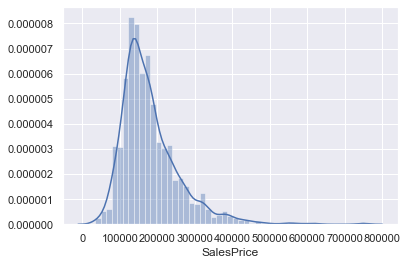

In [53]:
import seaborn as sns
sns.set()
SalesPrice=sns.distplot(EntrenaPandas["SalesPrice"])

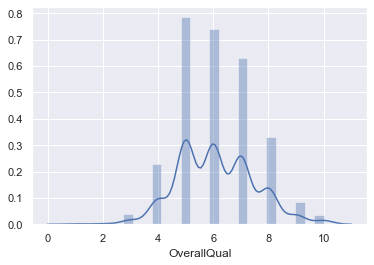

In [55]:
sns.set()
OverallQual=sns.distplot(EntrenaPandas["OverallQual"])

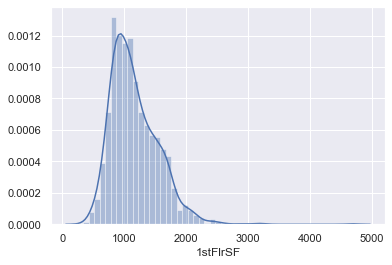

In [58]:
sns.set()
firstFloorSF=sns.distplot(EntrenaPandas["1stFlrSF"])

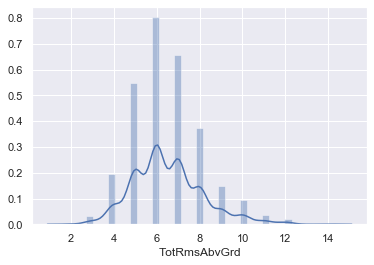

In [59]:
sns.set()
TotRmsAbvGrd=sns.distplot(EntrenaPandas["TotRmsAbvGrd"])

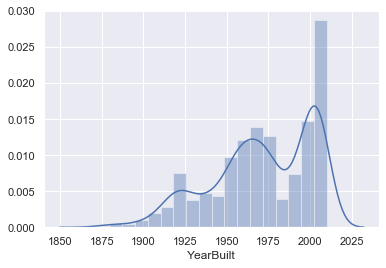

In [60]:
sns.set()
YearBuilt=sns.distplot(EntrenaPandas["YearBuilt"])

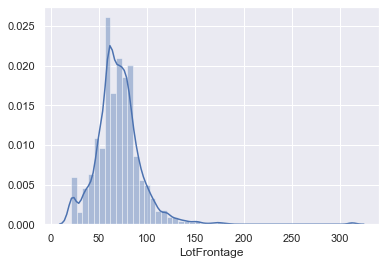

In [74]:
sns.set()
LotFrontageSinNaN=EntrenaPandas["LotFrontage"][~np.isnan(EntrenaPandas["LotFrontage"])]
SalesPriceSinNaN=EntrenaPandas["SalesPrice"][~np.isnan(EntrenaPandas["LotFrontage"])]
LotFrontage=sns.distplot(LotFrontageSinNaN)

## Calculando valores para las variables independientes

### Coeficiente de correlación

In [87]:
CCCalificacion=np.corrcoef(EntrenaPandas["SalesPrice"],EntrenaPandas["OverallQual"])[0,1]
CC1erPisoSF=np.corrcoef(EntrenaPandas["SalesPrice"],EntrenaPandas["1stFlrSF"])[0,1]
CCCuartos=np.corrcoef(EntrenaPandas["SalesPrice"],EntrenaPandas["TotRmsAbvGrd"])[0,1]
CCAnioConstruye=np.corrcoef(EntrenaPandas["SalesPrice"],EntrenaPandas["YearBuilt"])[0,1]
CCFrente=np.corrcoef(SalesPriceSinNaN,LotFrontageSinNaN)[0,1]
print("Coeficiente correlacion precio vs Calificacion: ",CCCalificacion)
print("Coeficiente correlacion precio vs Pies Cuadrados Primer Piso: ",CC1erPisoSF)
print("Coeficiente correlacion precio vs cantidad cuartos: ",CCCuartos)
print("Coeficiente correlacion precio vs año Construccion: " ,CCAnioConstruye)
print("Coeficiente correlacion precio vs Frente lote: ",CCFrente)

Coeficiente correlacion precio vs Calificacion:  0.7909816005838048
Coeficiente correlacion precio vs Pies Cuadrados Primer Piso:  0.6058521846919147
Coeficiente correlacion precio vs cantidad cuartos:  0.5337231555820284
Coeficiente correlacion precio vs año Construccion:  0.5228973328794969
Coeficiente correlacion precio vs Frente lote:  0.3517990965706781


### Graficando datos

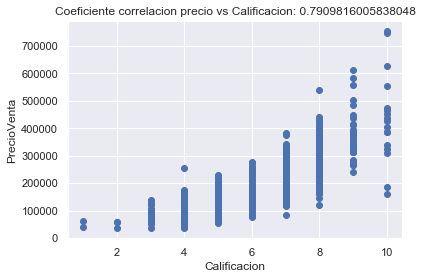

In [88]:
import matplotlib.pyplot as plt
plt.scatter(EntrenaPandas["OverallQual"],EntrenaPandas["SalesPrice"])
tituloCalificacion="Coeficiente correlacion precio vs Calificacion: "+str(CCCalificacion)
plt.title(tituloCalificacion)
plt.xlabel("Calificacion")
plt.ylabel("Precio Venta")
plt.show()

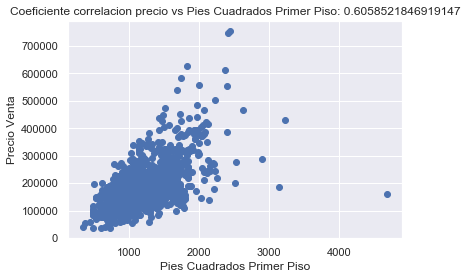

In [101]:
plt.scatter(EntrenaPandas["1stFlrSF"],EntrenaPandas["SalesPrice"])
tituloPiesCuadrados="Coeficiente correlacion precio vs Pies Cuadrados Primer Piso: "+str(CC1erPisoSF)
plt.title(tituloPiesCuadrados)
plt.xlabel("Pies Cuadrados Primer Piso")
plt.ylabel("Precio Venta")
plt.show()

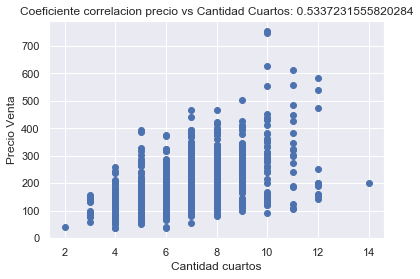

In [92]:
plt.scatter(EntrenaPandas["TotRmsAbvGrd"],EntrenaPandas["SalesPrice"])
tituloCantidadCuartos="Coeficiente correlacion precio vs Cantidad Cuartos: "+str(CCCuartos)
plt.title(tituloCantidadCuartos)
plt.xlabel("Cantidad cuartos")
plt.ylabel("Precio Venta")
plt.show()

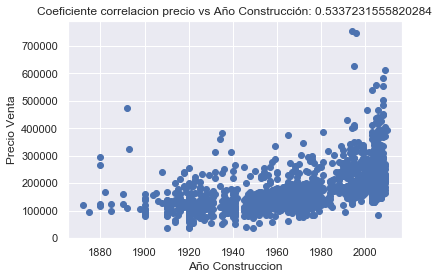

In [102]:
plt.scatter(EntrenaPandas["YearBuilt"],EntrenaPandas["SalesPrice"])
tituloAnioConstruye="Coeficiente correlacion precio vs Año Construcción: "+str(CCAnioConstruye)
plt.title(tituloAnioConstruye)
plt.xlabel("Año Construccion")
plt.ylabel("Precio Venta")
plt.show()

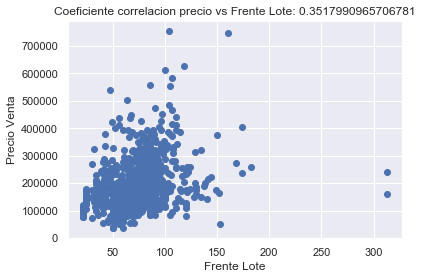

In [103]:
plt.scatter(LotFrontageSinNaN,SalesPriceSinNaN)
tituloFrenteLote="Coeficiente correlacion precio vs Frente Lote: "+str(CCFrente)
plt.title(tituloFrenteLote)
plt.xlabel("Frente Lote")
plt.ylabel("Precio Venta")
plt.show()

Después de analizar la correlación entre variables se eligen las variables "OverallQual" y "1stFlrSF" como variables que tienen un mayor potencial predictivo.

## Generando el modelo de datos
A continuación se muestra la generación del modelo de datos

In [307]:
def ModeloDatos(arreglo1):
    datos=np.array([[0,0]])
    error=np.array([0])
    indices=np.array([0])
    m=0
    b=0
    ErrorAntiguo=np.inf
    ErrorPromedio=np.inf
    learningRate=0.000001
    i=0
    #for i in range(1,96):#1460
    while(ErrorAntiguo-error[i]>100000):
        print(i,":" ,(ErrorAntiguo-error[i]))
        i+=1
        yHat=m*arreglo1+b
        ErrorAntiguo=ErrorPromedio
        ErrorPromedio=np.average(np.power((yHat-EntrenaPandas["SalesPrice"]),2)/2)
        error=np.append(error,[ErrorPromedio], axis=0)
        #print(ErrorPromedio)
        gradienteM,gradienteB=np.average((yHat-EntrenaPandas["SalesPrice"])*arreglo1),np.average((yHat-EntrenaPandas["SalesPrice"]))
        #print(gradienteM)
        #gradienteB=np.average((yHat-EntrenaPandas["SalesPrice"]))
        #print(gradienteB)
        m,b=m-learningRate*gradienteM,b-learningRate*gradienteB
        datos=np.append(datos,[[m,b]], axis=0)
        indices=np.append(indices,[i], axis=0)
        #print(i,":",datos)
        #b=b-learningRate*gradienteB
        #print(i,":",m," ",b," ",ErrorPromedio)
        #print("DESPUÉS DE 10 VECES QUEDÓ m=",m," y QUEDO b=",b, " CON ERROR DE: ",ErrorPromedio)
    return indices,datos, error
    
indicesCalifica,datosModeloCalifica,errorCalifica=ModeloDatos(EntrenaPandas["OverallQual"])
indicesSF,datosSF,errorSF=ModeloDatos(EntrenaPandas["1stFlrSF"])

0 : inf
1 : inf
2 : 1449612.7044754028
3 : 1449496.5503463745
4 : 1449380.4055175781
5 : 1449264.2700042725
6 : 1449148.1437835693
7 : 1449032.026878357
8 : 1448915.9192771912
9 : 1448799.8209724426
10 : 1448683.7319831848
11 : 1448567.6522827148
12 : 1448451.5818862915
13 : 1448335.5207977295
14 : 1448219.4690055847
15 : 1448103.4265098572
16 : 1447987.3933143616
17 : 1447871.3694152832
18 : 1447755.354812622
19 : 1447639.3495101929
20 : 1447523.3534965515
21 : 1447407.3667869568
22 : 1447291.3893623352
23 : 1447175.4212303162
24 : 1447059.4624061584
25 : 1446943.5128555298
26 : 1446827.5726013184
27 : 1446711.6416397095
28 : 1446595.7199630737
29 : 1446479.8075828552
30 : 1446363.9044837952
31 : 1446248.0106773376
32 : 1446132.1261520386
33 : 1446016.2509117126
34 : 1445900.3849639893
35 : 1445784.5282936096
36 : 1445668.6809082031
37 : 1445552.8428077698
38 : 1445437.0139846802
39 : 1445321.1944503784
40 : 1445205.3841896057
41 : 1445089.5832099915
42 : 1444973.7915115356
43 : 14448

341 : 1410764.9113883972
342 : 1410651.8700828552
343 : 1410538.8378448486
344 : 1410425.814666748
345 : 1410312.8005371094
346 : 1410199.7954673767
347 : 1410086.7994499207
348 : 1409973.8124923706
349 : 1409860.8345832825
350 : 1409747.8657302856
351 : 1409634.9059257507
352 : 1409521.9551773071
353 : 1409409.013469696
354 : 1409296.0808258057
355 : 1409183.157218933
356 : 1409070.2426681519
357 : 1408957.3371620178
358 : 1408844.4407043457
359 : 1408731.5532913208
360 : 1408618.6749267578
361 : 1408505.8056030273
362 : 1408392.945323944
363 : 1408280.0940933228
364 : 1408167.2518997192
365 : 1408054.418750763
366 : 1407941.5946426392
367 : 1407828.7795715332
368 : 1407715.9735488892
369 : 1407603.1765518188
370 : 1407490.3886070251
371 : 1407377.6096916199
372 : 1407264.8398132324
373 : 1407152.0789794922
374 : 1407039.327167511
375 : 1406926.5844039917
376 : 1406813.8506622314
377 : 1406701.1259613037
378 : 1406588.4102897644
379 : 1406475.7036514282
380 : 1406363.0060424805
381 : 

698 : 1370979.3413887024
699 : 1370869.4880714417
700 : 1370759.6435546875
701 : 1370649.80783844
702 : 1370539.980922699
703 : 1370430.1628112793
704 : 1370320.3534965515
705 : 1370210.5529823303
706 : 1370100.761264801
707 : 1369990.9783439636
708 : 1369881.2042236328
709 : 1369771.4388923645
710 : 1369661.6823616028
711 : 1369551.9346313477
712 : 1369442.1956863403
713 : 1369332.4655342102
714 : 1369222.7441749573
715 : 1369113.031616211
716 : 1369003.3278388977
717 : 1368893.6328582764
718 : 1368783.9466629028
719 : 1368674.2692565918
720 : 1368564.600643158
721 : 1368454.9408111572
722 : 1368345.2897720337
723 : 1368235.6475143433
724 : 1368126.01404953
725 : 1368016.3893623352
726 : 1367906.7734603882
727 : 1367797.166343689
728 : 1367687.5680084229
729 : 1367577.9784545898
730 : 1367468.3976860046
731 : 1367358.8256912231
732 : 1367249.2624816895
733 : 1367139.7080497742
734 : 1367030.162399292
735 : 1366920.6255187988
736 : 1366811.0974235535
737 : 1366701.5781021118
738 : 1366

1122 : 1325182.0785713196
1123 : 1325075.8949394226
1124 : 1324969.71982193
1125 : 1324863.5532035828
1126 : 1324757.39509964
1127 : 1324651.2454948425
1128 : 1324545.1044006348
1129 : 1324438.971813202
1130 : 1324332.8477249146
1131 : 1324226.7321472168
1132 : 1324120.6250648499
1133 : 1324014.5264930725
1134 : 1323908.4364089966
1135 : 1323802.354839325
1136 : 1323696.2817611694
1137 : 1323590.2171897888
1138 : 1323484.1611175537
1139 : 1323378.11353302
1140 : 1323272.074459076
1141 : 1323166.0438728333
1142 : 1323060.0217819214
1143 : 1322954.0081939697
1144 : 1322848.0030975342
1145 : 1322742.0064964294
1146 : 1322636.0183792114
1147 : 1322530.038772583
1148 : 1322424.0676383972
1149 : 1322318.1050109863
1150 : 1322212.1508636475
1151 : 1322106.205215454
1152 : 1322000.2680511475
1153 : 1321894.3393745422
1154 : 1321788.4191894531
1155 : 1321682.5074882507
1156 : 1321576.6042747498
1157 : 1321470.709552765
1158 : 1321364.8233070374
1159 : 1321258.9455451965
1160 : 1321153.076278686

1447 : 1291116.5255584717
1448 : 1291013.0715637207
1449 : 1290909.6258621216
1450 : 1290806.1884498596
1451 : 1290702.7593231201
1452 : 1290599.3384933472
1453 : 1290495.9259376526
1454 : 1290392.5216789246
1455 : 1290289.1256980896
1456 : 1290185.7380104065
1457 : 1290082.3586006165
1458 : 1289978.9874725342
1459 : 1289875.624633789
1460 : 1289772.270072937
1461 : 1289668.9237976074
1462 : 1289565.5858039856
1463 : 1289462.2560806274
1464 : 1289358.9346504211
1465 : 1289255.6214942932
1466 : 1289152.316608429
1467 : 1289049.0200157166
1468 : 1288945.7316856384
1469 : 1288842.4516448975
1470 : 1288739.1798667908
1471 : 1288635.9163703918
1472 : 1288532.661151886
1473 : 1288429.414199829
1474 : 1288326.1755256653
1475 : 1288222.9451217651
1476 : 1288119.7229881287
1477 : 1288016.5091323853
1478 : 1287913.3035430908
1479 : 1287810.1062164307
1480 : 1287706.9171714783
1481 : 1287603.7363815308
1482 : 1287500.5638771057
1483 : 1287397.3996238708
1484 : 1287294.2436447144
1485 : 1287191.09

1780 : 1257120.558063507
1781 : 1257019.8281345367
1782 : 1256919.1062793732
1783 : 1256818.3924884796
1784 : 1256717.6867790222
1785 : 1256616.9891319275
1786 : 1256516.2995529175
1787 : 1256415.6180400848
1788 : 1256314.9446048737
1789 : 1256214.2792243958
1790 : 1256113.6219177246
1791 : 1256012.9726753235
1792 : 1255912.331495285
1793 : 1255811.698381424
1794 : 1255711.0733337402
1795 : 1255610.4563407898
1796 : 1255509.8474197388
1797 : 1255409.246559143
1798 : 1255308.6537513733
1799 : 1255208.0690135956
1800 : 1255107.492324829
1801 : 1255006.9237117767
1802 : 1254906.3631420135
1803 : 1254805.810634613
1804 : 1254705.2661876678
1805 : 1254604.7297916412
1806 : 1254504.2014541626
1807 : 1254403.681175232
1808 : 1254303.1689434052
1809 : 1254202.664773941
1810 : 1254102.1686534882
1811 : 1254001.6805839539
1812 : 1253901.2005710602
1813 : 1253800.7286052704
1814 : 1253700.2646923065
1815 : 1253599.8088283539
1816 : 1253499.3610153198
1817 : 1253398.9212493896
1818 : 1253298.48953

2135 : 1221863.851070404
2136 : 1221765.9462280273
2137 : 1221668.049232483
2138 : 1221570.1600723267
2139 : 1221472.2787685394
2140 : 1221374.4053020477
2141 : 1221276.5396728516
2142 : 1221178.681892395
2143 : 1221080.8319530487
2144 : 1220982.989850998
2145 : 1220885.1555862427
2146 : 1220787.3291740417
2147 : 1220689.510585785
2148 : 1220591.6998443604
2149 : 1220493.896938324
2150 : 1220396.1018619537
2151 : 1220298.3146324158
2152 : 1220200.5352344513
2153 : 1220102.763671875
2154 : 1220004.9999408722
2155 : 1219907.244047165
2156 : 1219809.4959850311
2157 : 1219711.7557563782
2158 : 1219614.0233573914
2159 : 1219516.2987880707
2160 : 1219418.5820522308
2161 : 1219320.8731517792
2162 : 1219223.1720695496
2163 : 1219125.4788246155
2164 : 1219027.7934036255
2165 : 1218930.1158103943
2166 : 1218832.4460449219
2167 : 1218734.7841091156
2168 : 1218637.1299915314
2169 : 1218539.483701706
2170 : 1218441.8452358246
2171 : 1218344.214597702
2172 : 1218246.5917816162
2173 : 1218148.9767818

2492 : 1187405.648015976
2493 : 1187310.5042705536
2494 : 1187215.3681468964
2495 : 1187120.239660263
2496 : 1187025.1187820435
2497 : 1186930.005537033
2498 : 1186834.899904251
2499 : 1186739.801902771
2500 : 1186644.71150589
2501 : 1186549.6287460327
2502 : 1186454.5535907745
2503 : 1186359.4860630035
2504 : 1186264.4261455536
2505 : 1186169.3738517761
2506 : 1186074.3291740417
2507 : 1185979.2921066284
2508 : 1185884.2626590729
2509 : 1185789.2408218384
2510 : 1185694.2266025543
2511 : 1185599.219997406
2512 : 1185504.2210025787
2513 : 1185409.2296237946
2514 : 1185314.245847702
2515 : 1185219.2696914673
2516 : 1185124.3011398315
2517 : 1185029.3402023315
2518 : 1184934.3868732452
2519 : 1184839.4411506653
2520 : 1184744.503036499
2521 : 1184649.5725307465
2522 : 1184554.6496276855
2523 : 1184459.734336853
2524 : 1184364.8266506195
2525 : 1184269.926563263
2526 : 1184175.0340862274
2527 : 1184080.1492080688
2528 : 1183985.271938324
2529 : 1183890.402267456
2530 : 1183795.5401992798


2854 : 1153457.002943039
2855 : 1153364.5794734955
2856 : 1153272.1634101868
2857 : 1153179.7547512054
2858 : 1153087.3534946442
2859 : 1152994.9596424103
2860 : 1152902.5732002258
2861 : 1152810.194152832
2862 : 1152717.8225135803
2863 : 1152625.458267212
2864 : 1152533.1014328003
2865 : 1152440.7519931793
2866 : 1152348.4099559784
2867 : 1152256.075313568
2868 : 1152163.7480697632
2869 : 1152071.4282302856
2870 : 1151979.115787506
2871 : 1151886.8107337952
2872 : 1151794.513080597
2873 : 1151702.2228279114
2874 : 1151609.9399700165
2875 : 1151517.6644954681
2876 : 1151425.3964252472
2877 : 1151333.1357517242
2878 : 1151240.8824558258
2879 : 1151148.636566162
2880 : 1151056.398059845
2881 : 1150964.1669464111
2882 : 1150871.9432296753
2883 : 1150779.7268981934
2884 : 1150687.517950058
2885 : 1150595.3164024353
2886 : 1150503.1222324371
2887 : 1150410.935453415
2888 : 1150318.7560634613
2889 : 1150226.5840568542
2890 : 1150134.4194335938
2891 : 1150042.2622032166
2892 : 1149950.1123523

3229 : 1119312.3977832794
3230 : 1119222.7102909088
3231 : 1119133.029975891
3232 : 1119043.3568515778
3233 : 1118953.6909179688
3234 : 1118864.0321598053
3235 : 1118774.3805885315
3236 : 1118684.7362041473
3237 : 1118595.0990028381
3238 : 1118505.4689807892
3239 : 1118415.8461418152
3240 : 1118326.2304840088
3241 : 1118236.6220092773
3242 : 1118147.0207138062
3243 : 1118057.4265937805
3244 : 1117967.8396625519
3245 : 1117878.2599048615
3246 : 1117788.6873188019
3247 : 1117699.1219177246
3248 : 1117609.5636844635
3249 : 1117520.0126419067
3250 : 1117430.4687633514
3251 : 1117340.9320659637
3252 : 1117251.4025363922
3253 : 1117161.8801898956
3254 : 1117072.3650093079
3255 : 1116982.857006073
3256 : 1116893.356168747
3257 : 1116803.8625106812
3258 : 1116714.3760223389
3259 : 1116624.896697998
3260 : 1116535.4245491028
3261 : 1116445.959569931
3262 : 1116356.5017547607
3263 : 1116267.0511131287
3264 : 1116177.607635498
3265 : 1116088.1713294983
3266 : 1115998.742181778
3267 : 1115909.3202

3574 : 1088792.7821540833
3575 : 1088705.5401649475
3576 : 1088618.3051643372
3577 : 1088531.077156067
3578 : 1088443.8561325073
3579 : 1088356.6421012878
3580 : 1088269.435060501
3581 : 1088182.2350063324
3582 : 1088095.0419387817
3583 : 1088007.8558540344
3584 : 1087920.6767635345
3585 : 1087833.504650116
3586 : 1087746.3395252228
3587 : 1087659.181388855
3588 : 1087572.0302295685
3589 : 1087484.8860607147
3590 : 1087397.7488651276
3591 : 1087310.6186618805
3592 : 1087223.4954357147
3593 : 1087136.3791885376
3594 : 1087049.2699260712
3595 : 1086962.167640686
3596 : 1086875.0723342896
3597 : 1086787.984008789
3598 : 1086700.9026622772
3599 : 1086613.8282928467
3600 : 1086526.76089859
3601 : 1086439.7004833221
3602 : 1086352.6470413208
3603 : 1086265.600578308
3604 : 1086178.5610866547
3605 : 1086091.5285682678
3606 : 1086004.5030345917
3607 : 1085917.4844608307
3608 : 1085830.472864151
3609 : 1085743.4682426453
3610 : 1085656.4705905914
3611 : 1085569.4799118042
3612 : 1085482.4961986

3910 : 1059869.4186210632
3911 : 1059784.4942321777
3912 : 1059699.5766448975
3913 : 1059614.6658668518
3914 : 1059529.7618865967
3915 : 1059444.8647155762
3916 : 1059359.974346161
3917 : 1059275.0907764435
3918 : 1059190.214006424
3919 : 1059105.344039917
3920 : 1059020.48087883
3921 : 1058935.624513626
3922 : 1058850.7749443054
3923 : 1058765.9321804047
3924 : 1058681.0962085724
3925 : 1058596.2670402527
3926 : 1058511.444662094
3927 : 1058426.6290912628
3928 : 1058341.820306778
3929 : 1058257.0183258057
3930 : 1058172.2231292725
3931 : 1058087.4347419739
3932 : 1058002.6531352997
3933 : 1057917.8783245087
3934 : 1057833.1103172302
3935 : 1057748.3490905762
3936 : 1057663.5946598053
3937 : 1057578.8470191956
3938 : 1057494.1061706543
3939 : 1057409.3721141815
3940 : 1057324.6448421478
3941 : 1057239.92436409
3942 : 1057155.210674286
3943 : 1057070.5037708282
3944 : 1056985.8036575317
3945 : 1056901.110321045
3946 : 1056816.4237861633
3947 : 1056731.7440280914
3948 : 1056647.071052551

4231 : 1032955.23046875
4232 : 1032872.4626846313
4233 : 1032789.7015323639
4234 : 1032706.947019577
4235 : 1032624.1991252899
4236 : 1032541.457868576
4237 : 1032458.723241806
4238 : 1032375.9952449799
4239 : 1032293.2738780975
4240 : 1032210.5591335297
4241 : 1032127.8510169983
4242 : 1032045.1495342255
4243 : 1031962.4546794891
4244 : 1031879.7664413452
4245 : 1031797.0848407745
4246 : 1031714.4098510742
4247 : 1031631.7415027618
4248 : 1031549.0797615051
4249 : 1031466.424654007
4250 : 1031383.7761707306
4251 : 1031301.1343040466
4252 : 1031218.4990634918
4253 : 1031135.8704471588
4254 : 1031053.2484455109
4255 : 1030970.6330661774
4256 : 1030888.024307251
4257 : 1030805.422164917
4258 : 1030722.8266448975
4259 : 1030640.237745285
4260 : 1030557.6554584503
4261 : 1030475.0797920227
4262 : 1030392.5107421875
4263 : 1030309.9483032227
4264 : 1030227.3924884796
4265 : 1030144.8432865143
4266 : 1030062.300693512
4267 : 1029979.7647209167
4268 : 1029897.2353553772
4269 : 1029814.7126083

4649 : 998929.9353675842
4650 : 998849.8939990997
4651 : 998769.8590431213
4652 : 998689.8305015564
4653 : 998609.8083667755
4654 : 998529.7926521301
4655 : 998449.7833423615
4656 : 998369.7804470062
4657 : 998289.7839641571
4658 : 998209.793888092
4659 : 998129.8102226257
4660 : 998049.8329677582
4661 : 997969.862121582
4662 : 997889.8976745605
4663 : 997809.9396476746
4664 : 997729.9880218506
4665 : 997650.0428009033
4666 : 997570.1039867401
4667 : 997490.1715831757
4668 : 997410.2455768585
4669 : 997330.3259792328
4670 : 997250.4127864838
4671 : 997170.5059928894
4672 : 997090.6056060791
4673 : 997010.7116184235
4674 : 996930.8240375519
4675 : 996850.9428501129
4676 : 996771.0680732727
4677 : 996691.1996841431
4678 : 996611.3377094269
4679 : 996531.4821243286
4680 : 996451.6329421997
4681 : 996371.7901515961
4682 : 996291.9537658691
4683 : 996212.1237754822
4684 : 996132.3001823425
4685 : 996052.4829826355
4686 : 995972.6721801758
4687 : 995892.867773056
4688 : 995813.0697612762
468

5042 : 967962.5872688293
5043 : 967885.0272865295
5044 : 967807.4735145569
5045 : 967729.9259529114
5046 : 967652.3846130371
5047 : 967574.8494796753
5048 : 967497.32056427
5049 : 967419.7978591919
5050 : 967342.2813625336
5051 : 967264.7710838318
5052 : 967187.2670116425
5053 : 967109.7691478729
5054 : 967032.2774963379
5055 : 966954.7920589447
5056 : 966877.3128204346
5057 : 966799.8398017883
5058 : 966722.3729763031
5059 : 966644.9123744965
5060 : 966567.4579677582
5061 : 966490.0097732544
5062 : 966412.5677776337
5063 : 966335.1319980621
5064 : 966257.702419281
5065 : 966180.2790336609
5066 : 966102.8618717194
5067 : 966025.4508972168
5068 : 965948.0461368561
5069 : 965870.647567749
5070 : 965793.2552032471
5071 : 965715.8690490723
5072 : 965638.4890842438
5073 : 965561.1153316498
5074 : 965483.7477684021
5075 : 965406.3864078522
5076 : 965329.031244278
5077 : 965251.6822891235
5078 : 965174.3395214081
5079 : 965097.002954483
5080 : 965019.672580719
5081 : 964942.3484115601
5082 : 

5449 : 936903.6362285614
5450 : 936828.5649662018
5451 : 936753.499715805
5452 : 936678.440486908
5453 : 936603.3872623444
5454 : 936528.3400630951
5455 : 936453.2988643646
5456 : 936378.2636909485
5457 : 936303.2345256805
5458 : 936228.2113647461
5459 : 936153.194229126
5460 : 936078.18309021
5461 : 936003.1779727936
5462 : 935928.1788635254
5463 : 935853.185760498
5464 : 935778.1986656189
5465 : 935703.2175865173
5466 : 935628.2425079346
5467 : 935553.2734413147
5468 : 935478.3103809357
5469 : 935403.3533248901
5470 : 935328.4022789001
5471 : 935253.4572372437
5472 : 935178.5181999207
5473 : 935103.5851688385
5474 : 935028.6581420898
5475 : 934953.7371139526
5476 : 934878.822095871
5477 : 934803.9130764008
5478 : 934729.0100650787
5479 : 934654.1130523682
5480 : 934579.2220344543
5481 : 934504.3370304108
5482 : 934429.4580173492
5483 : 934354.5850048065
5484 : 934279.7179985046
5485 : 934204.8569793701
5486 : 934130.0019702911
5487 : 934055.1529579163
5488 : 933980.3099346161
5489 : 

5842 : 907859.1812076569
5843 : 907786.4372463226
5844 : 907713.6991138458
5845 : 907640.9668121338
5846 : 907568.2403373718
5847 : 907495.5196914673
5848 : 907422.8048667908
5849 : 907350.0958709717
5850 : 907277.3927059174
5851 : 907204.6953639984
5852 : 907132.0038509369
5853 : 907059.3181533813
5854 : 906986.6382827759
5855 : 906913.9642448425
5856 : 906841.2960186005
5857 : 906768.6336212158
5858 : 906695.9770412445
5859 : 906623.326292038
5860 : 906550.6813602448
5861 : 906478.0422458649
5862 : 906405.4089546204
5863 : 906332.7814865112
5864 : 906260.1598339081
5865 : 906187.5439987183
5866 : 906114.9339847565
5867 : 906042.3297920227
5868 : 905969.7314128876
5869 : 905897.1388511658
5870 : 905824.5521030426
5871 : 905751.9711856842
5872 : 905679.3960666656
5873 : 905606.8267707825
5874 : 905534.2632865906
5875 : 905461.7056236267
5876 : 905389.1537704468
5877 : 905316.6077270508
5878 : 905244.0674991608
5879 : 905171.5330924988
5880 : 905099.0044879913
5881 : 905026.4816951752
5

6250 : 878658.4014778137
6251 : 878587.9973449707
6252 : 878517.5988559723
6253 : 878447.2060089111
6254 : 878376.8187980652
6255 : 878306.4372291565
6256 : 878236.0613040924
6257 : 878165.6910133362
6258 : 878095.3263607025
6259 : 878024.9673480988
6260 : 877954.6139755249
6261 : 877884.2662372589
6262 : 877813.9241390228
6263 : 877743.5876750946
6264 : 877673.2568416595
6265 : 877602.9316539764
6266 : 877532.6120967865
6267 : 877462.2981719971
6268 : 877391.9898815155
6269 : 877321.6872329712
6270 : 877251.3902072906
6271 : 877181.09882164
6272 : 877110.8130626678
6273 : 877040.5329380035
6274 : 876970.2584476471
6275 : 876899.9895839691
6276 : 876829.7263507843
6277 : 876759.4687519073
6278 : 876689.2167816162
6279 : 876618.9704380035
6280 : 876548.729724884
6281 : 876478.494638443
6282 : 876408.2651844025
6283 : 876338.0413513184
6284 : 876267.8231487274
6285 : 876197.6105709076
6286 : 876127.4036235809
6287 : 876057.2022953033
6288 : 875987.0065975189
6289 : 875916.816526413
6290 

6642 : 851487.8487644196
6643 : 851419.6217823029
6644 : 851351.400270462
6645 : 851283.184223175
6646 : 851214.9736404419
6647 : 851146.7685222626
6648 : 851078.5688705444
6649 : 851010.3746871948
6650 : 850942.185962677
6651 : 850874.0027046204
6652 : 850805.8249111176
6653 : 850737.6525802612
6654 : 850669.4857063293
6655 : 850601.3243026733
6656 : 850533.1683559418
6657 : 850465.0178756714
6658 : 850396.8728466034
6659 : 850328.7332878113
6660 : 850260.5991840363
6661 : 850192.4705410004
6662 : 850124.3473548889
6663 : 850056.229631424
6664 : 849988.1173610687
6665 : 849920.01055336
6666 : 849851.9092025757
6667 : 849783.8133049011
6668 : 849715.7228679657
6669 : 849647.6378822327
6670 : 849579.5583553314
6671 : 849511.4842834473
6672 : 849443.4156665802
6673 : 849375.3525047302
6674 : 849307.2947940826
6675 : 849239.2425384521
6676 : 849171.1957321167
6677 : 849103.154384613
6678 : 849035.1184844971
6679 : 848967.0880393982
6680 : 848899.063041687
6681 : 848831.0434989929
6682 : 8

7052 : 823968.2088394165
7053 : 823902.1869792938
7054 : 823836.1704120636
7055 : 823770.1591281891
7056 : 823704.1531391144
7057 : 823638.1524372101
7058 : 823572.1570205688
7059 : 823506.1669006348
7060 : 823440.1820602417
7061 : 823374.2025127411
7062 : 823308.2282447815
7063 : 823242.2592754364
7064 : 823176.2955780029
7065 : 823110.3371753693
7066 : 823044.3840579987
7067 : 822978.4362201691
7068 : 822912.4936714172
7069 : 822846.5564022064
7070 : 822780.624420166
7071 : 822714.6977176666
7072 : 822648.776304245
7073 : 822582.8601646423
7074 : 822516.9493122101
7075 : 822451.0437431335
7076 : 822385.1434459686
7077 : 822319.2484397888
7078 : 822253.358707428
7079 : 822187.4742565155
7080 : 822121.5950870514
7081 : 822055.7211875916
7082 : 821989.8525829315
7083 : 821923.989238739
7084 : 821858.1311836243
7085 : 821792.2783985138
7086 : 821726.4308948517
7087 : 821660.5886669159
7088 : 821594.7517127991
7089 : 821528.9200382233
7090 : 821463.0936317444
7091 : 821397.2725048065
7092

7461 : 797401.9070396423
7462 : 797338.0139045715
7463 : 797274.1258983612
7464 : 797210.2430057526
7465 : 797146.3652362823
7466 : 797082.4925842285
7467 : 797018.6250495911
7468 : 796954.76263237
7469 : 796890.9053325653
7470 : 796827.0531482697
7471 : 796763.2060832977
7472 : 796699.3641338348
7473 : 796635.5273017883
7474 : 796571.6955776215
7475 : 796507.8689727783
7476 : 796444.0474834442
7477 : 796380.2311077118
7478 : 796316.4198417664
7479 : 796252.6136951447
7480 : 796188.8126564026
7481 : 796125.0167312622
7482 : 796061.2259197235
7483 : 795997.4402179718
7484 : 795933.6596260071
7485 : 795869.884147644
7486 : 795806.1137771606
7487 : 795742.3485202789
7488 : 795678.5883693695
7489 : 795614.8333244324
7490 : 795551.0833950043
7491 : 795487.3385715485
7492 : 795423.5988540649
7493 : 795359.8642444611
7494 : 795296.1347446442
7495 : 795232.4103469849
7496 : 795168.6910572052
7497 : 795104.9768772125
7498 : 795041.2677974701
7499 : 794977.5638237
7500 : 794913.8649539948
7501 :

7848 : 773053.7589550018
7849 : 772991.81681633
7850 : 772929.8796463013
7851 : 772867.9474334717
7852 : 772806.0201892853
7853 : 772744.0979003906
7854 : 772682.1805820465
7855 : 772620.2682189941
7856 : 772558.3608188629
7857 : 772496.4583740234
7858 : 772434.5608978271
7859 : 772372.66837883
7860 : 772310.7808151245
7861 : 772248.8982143402
7862 : 772187.020570755
7863 : 772125.1478862762
7864 : 772063.2801570892
7865 : 772001.4173908234
7866 : 771939.5595741272
7867 : 771877.7067184448
7868 : 771815.8588199615
7869 : 771754.0158748627
7870 : 771692.1778869629
7871 : 771630.3448524475
7872 : 771568.5167751312
7873 : 771506.6936473846
7874 : 771444.8754768372
7875 : 771383.0622596741
7876 : 771321.2539920807
7877 : 771259.4506855011
7878 : 771197.6523227692
7879 : 771135.8589134216
7880 : 771074.0704574585
7881 : 771012.2869548798
7882 : 770950.508398056
7883 : 770888.734790802
7884 : 770826.9661407471
7885 : 770765.2024326324
7886 : 770703.4436779022
7887 : 770641.689868927
7888 : 7

8222 : 750230.1851291656
8223 : 750170.0718212128
8224 : 750109.9633350372
8225 : 750049.8596611023
8226 : 749989.7608070374
8227 : 749929.6667633057
8228 : 749869.5775375366
8229 : 749809.4931297302
8230 : 749749.4135322571
8231 : 749689.3387508392
8232 : 749629.268781662
8233 : 749569.20362854
8234 : 749509.1432857513
8235 : 749449.0877552032
8236 : 749389.0370388031
8237 : 749328.9911327362
8238 : 749268.9500427246
8239 : 749208.9137573242
8240 : 749148.8822841644
8241 : 749088.8556232452
8242 : 749028.833770752
8243 : 748968.8167266846
8244 : 748908.8044948578
8245 : 748848.7970714569
8246 : 748788.7944545746
8247 : 748728.7966423035
8248 : 748668.8036460876
8249 : 748608.815448761
8250 : 748548.8320674896
8251 : 748488.8534812927
8252 : 748428.8797073364
8253 : 748368.9107398987
8254 : 748308.9465770721
8255 : 748248.9872169495
8256 : 748189.0326652527
8257 : 748129.0829124451
8258 : 748069.137966156
8259 : 748009.1978244781
8260 : 747949.2624835968
8261 : 747889.3319454193
8262 :

8630 : 726099.585357666
8631 : 726041.4056148529
8632 : 725983.2305297852
8633 : 725925.0601100922
8634 : 725866.8943500519
8635 : 725808.7332496643
8636 : 725750.5768127441
8637 : 725692.425031662
8638 : 725634.2779121399
8639 : 725576.1354522705
8640 : 725517.9976520538
8641 : 725459.8645057678
8642 : 725401.7360267639
8643 : 725343.612197876
8644 : 725285.4930286407
8645 : 725227.3785171509
8646 : 725169.268661499
8647 : 725111.1634597778
8648 : 725053.0629177094
8649 : 724994.9670295715
8650 : 724936.8757972717
8651 : 724878.7892169952
8652 : 724820.7072963715
8653 : 724762.630027771
8654 : 724704.5574111938
8655 : 724646.4894485474
8656 : 724588.4261379242
8657 : 724530.3674793243
8658 : 724472.3134784698
8659 : 724414.264125824
8660 : 724356.2194213867
8661 : 724298.1793708801
8662 : 724240.1439723969
8663 : 724182.1132202148
8664 : 724124.0871219635
8665 : 724066.0656738281
8666 : 724008.0488739014
8667 : 723950.0367183685
8668 : 723892.0292167664
8669 : 723834.0263614655
8670 :

9070 : 700945.5210113525
9071 : 700889.356836319
9072 : 700833.1971626282
9073 : 700777.0419883728
9074 : 700720.8913154602
9075 : 700664.7451381683
9076 : 700608.6034622192
9077 : 700552.4662857056
9078 : 700496.3336086273
9079 : 700440.2054233551
9080 : 700384.0817394257
9081 : 700327.9625530243
9082 : 700271.847864151
9083 : 700215.7376670837
9084 : 700159.6319713593
9085 : 700103.5307712555
9086 : 700047.4340629578
9087 : 699991.3418502808
9088 : 699935.2541351318
9089 : 699879.1709117889
9090 : 699823.0921840668
9091 : 699767.0179462433
9092 : 699710.9482040405
9093 : 699654.8829555511
9094 : 699598.8221988678
9095 : 699542.7659339905
9096 : 699486.7141590118
9097 : 699430.6668796539
9098 : 699374.6240882874
9099 : 699318.5857868195
9100 : 699262.5519771576
9101 : 699206.5226593018
9102 : 699150.4978275299
9103 : 699094.4774894714
9104 : 699038.4616336823
9105 : 698982.4502716064
9106 : 698926.443397522
9107 : 698870.4410057068
9108 : 698814.4431095123
9109 : 698758.4496917725
911

9400 : 682653.5201892853
9401 : 682598.8217334747
9402 : 682544.1276626587
9403 : 682489.4379730225
9404 : 682434.752664566
9405 : 682380.0717411041
9406 : 682325.3951950073
9407 : 682270.7230377197
9408 : 682216.0552501678
9409 : 682161.3918552399
9410 : 682106.7328300476
9411 : 682052.0781898499
9412 : 681997.4279289246
9413 : 681942.7820453644
9414 : 681888.1405410767
9415 : 681833.5034179688
9416 : 681778.8706703186
9417 : 681724.2422962189
9418 : 681669.618309021
9419 : 681614.9986896515
9420 : 681560.3834514618
9421 : 681505.7725906372
9422 : 681451.1661014557
9423 : 681396.5639915466
9424 : 681341.9662570953
9425 : 681287.3728942871
9426 : 681232.7839069366
9427 : 681178.199295044
9428 : 681123.6190547943
9429 : 681069.0431919098
9430 : 681014.471698761
9431 : 680959.9045791626
9432 : 680905.341835022
9433 : 680850.7834568024
9434 : 680796.2294559479
9435 : 680741.6798210144
9436 : 680687.134563446
9437 : 680632.5936698914
9438 : 680578.0571537018
9439 : 680523.5250034332
9440 :

9736 : 664519.324918747
9737 : 664466.0795383453
9738 : 664412.83842659
9739 : 664359.6015815735
9740 : 664306.3689994812
9741 : 664253.1406803131
9742 : 664199.916633606
9743 : 664146.6968460083
9744 : 664093.4813251495
9745 : 664040.270067215
9746 : 663987.0630760193
9747 : 663933.8603439331
9748 : 663880.6618766785
9749 : 663827.4676742554
9750 : 663774.2777328491
9751 : 663721.0920505524
9752 : 663667.9106330872
9753 : 663614.7334785461
9754 : 663561.5605812073
9755 : 663508.3919448853
9756 : 663455.2275733948
9757 : 663402.0674571991
9758 : 663348.9116039276
9759 : 663295.7600078583
9760 : 663242.6126689911
9761 : 663189.4695911407
9762 : 663136.3307743073
9763 : 663083.1962108612
9764 : 663030.065908432
9765 : 662976.9398593903
9766 : 662923.8180713654
9767 : 662870.7005367279
9768 : 662817.5872592926
9769 : 662764.4782428741
9770 : 662711.3734722137
9771 : 662658.2729644775
9772 : 662605.1767063141
9773 : 662552.0847072601
9774 : 662498.996963501
9775 : 662445.9134674072
9776 : 

10164 : 642115.7681331635
10165 : 642064.3179283142
10166 : 642012.8718452454
10167 : 641961.4298858643
10168 : 641909.9920482635
10169 : 641858.5583324432
10170 : 641807.1287384033
10171 : 641755.7032623291
10172 : 641704.2819099426
10173 : 641652.8646755219
10174 : 641601.4515666962
10175 : 641550.0425701141
10176 : 641498.6376972198
10177 : 641447.2369403839
10178 : 641395.8403091431
10179 : 641344.4477863312
10180 : 641293.0593891144
10181 : 641241.6751060486
10182 : 641190.2949428558
10183 : 641138.9188938141
10184 : 641087.546962738
10185 : 641036.179151535
10186 : 640984.815448761
10187 : 640933.4558696747
10188 : 640882.1004009247
10189 : 640830.7490463257
10190 : 640779.4018115997
10191 : 640728.0586872101
10192 : 640676.7196788788
10193 : 640625.3847827911
10194 : 640574.0540008545
10195 : 640522.7273330688
10196 : 640471.4047756195
10197 : 640420.0863323212
10198 : 640368.7719993591
10199 : 640317.4617805481
10200 : 640266.1556739807
10201 : 640214.8536739349
10202 : 640163.

10493 : 625409.1624355316
10494 : 625359.0509109497
10495 : 625308.9434108734
10496 : 625258.8399162292
10497 : 625208.740442276
10498 : 625158.6449794769
10499 : 625108.5535335541
10500 : 625058.4660987854
10501 : 625008.3826789856
10502 : 624958.3032722473
10503 : 624908.2278766632
10504 : 624858.1564941406
10505 : 624808.0891284943
10506 : 624758.0257663727
10507 : 624707.9664230347
10508 : 624657.9110851288
10509 : 624607.8597640991
10510 : 624557.8124504089
10511 : 624507.7691440582
10512 : 624457.7298545837
10513 : 624407.6945667267
10514 : 624357.6632938385
10515 : 624307.6360282898
10516 : 624257.6127738953
10517 : 624207.5935230255
10518 : 624157.5782814026
10519 : 624107.5670490265
10520 : 624057.5598239899
10521 : 624007.5566043854
10522 : 623957.5573921204
10523 : 623907.5621891022
10524 : 623857.5709896088
10525 : 623807.5837936401
10526 : 623757.6006069183
10527 : 623707.6214237213
10528 : 623657.6462440491
10529 : 623607.6750717163
10530 : 623557.7078990936
10531 : 62350

10830 : 608746.8943157196
10831 : 608698.1179275513
10832 : 608649.3454456329
10833 : 608600.5768737793
10834 : 608551.812204361
10835 : 608503.051448822
10836 : 608454.2945957184
10837 : 608405.5416488647
10838 : 608356.7926158905
10839 : 608308.0474815369
10840 : 608259.3062553406
10841 : 608210.5689353943
10842 : 608161.835521698
10843 : 608113.1060085297
10844 : 608064.380405426
10845 : 608015.658706665
10846 : 607966.9409065247
10847 : 607918.2270145416
10848 : 607869.5170269012
10849 : 607820.8109359741
10850 : 607772.1087532043
10851 : 607723.4104709625
10852 : 607674.7160930634
10853 : 607626.0256156921
10854 : 607577.3390388489
10855 : 607528.6563644409
10856 : 607479.9775886536
10857 : 607431.3027153015
10858 : 607382.6317443848
10859 : 607333.9646701813
10860 : 607285.3014984131
10861 : 607236.6422214508
10862 : 607187.9868450165
10863 : 607139.3353710175
10864 : 607090.6877937317
10865 : 607042.0441112518
10866 : 606993.4043312073
10867 : 606944.7684440613
10868 : 606896.13

11162 : 592766.0034732819
11163 : 592718.5076141357
11164 : 592671.0155639648
11165 : 592623.5273170471
11166 : 592576.0428771973
11167 : 592528.5622406006
11168 : 592481.0854091644
11169 : 592433.6123828888
11170 : 592386.1431598663
11171 : 592338.6777420044
11172 : 592291.2161216736
11173 : 592243.7583122253
11174 : 592196.3042984009
11175 : 592148.8540935516
11176 : 592101.4076862335
11177 : 592053.9650821686
11178 : 592006.5262813568
11179 : 591959.0912780762
11180 : 591911.6600780487
11181 : 591864.2326812744
11182 : 591816.8090801239
11183 : 591769.3892803192
11184 : 591721.973279953
11185 : 591674.5610809326
11186 : 591627.1526813507
11187 : 591579.7480773926
11188 : 591532.3472747803
11189 : 591484.9502658844
11190 : 591437.557062149
11191 : 591390.1676502228
11192 : 591342.782037735
11193 : 591295.400220871
11194 : 591248.0221996307
11195 : 591200.6479816437
11196 : 591153.277551651
11197 : 591105.9109210968
11198 : 591058.548084259
11199 : 591011.189043045
11200 : 590963.8338

11490 : 577389.6938591003
11491 : 577343.4300918579
11492 : 577297.1700305939
11493 : 577250.9136734009
11494 : 577204.661026001
11495 : 577158.4120826721
11496 : 577112.166847229
11497 : 577065.9253158569
11498 : 577019.6874885559
11499 : 576973.4533691406
11500 : 576927.2229537964
11501 : 576880.9962425232
11502 : 576834.7732334137
11503 : 576788.5539321899
11504 : 576742.3383312225
11505 : 576696.1264343262
11506 : 576649.9182395935
11507 : 576603.7137489319
11508 : 576557.5129585266
11509 : 576511.3158721924
11510 : 576465.1224861145
11511 : 576418.9328041077
11512 : 576372.7468204498
11513 : 576326.5645370483
11514 : 576280.3859558105
11515 : 576234.2110767365
11516 : 576188.039894104
11517 : 576141.8724136353
11518 : 576095.7086315155
11519 : 576049.5485458374
11520 : 576003.3921642303
11521 : 575957.2394771576
11522 : 575911.0904884338
11523 : 575864.9451980591
11524 : 575818.8036060333
11525 : 575772.6657123566
11526 : 575726.5315132141
11527 : 575680.401014328
11528 : 575634.2

11818 : 562412.2605657578
11819 : 562367.196926117
11820 : 562322.136891365
11821 : 562277.0804719925
11822 : 562232.0276622772
11823 : 562186.9784622192
11824 : 562141.9328718185
11825 : 562096.8908891678
11826 : 562051.8525180817
11827 : 562006.8177576065
11828 : 561961.7866010666
11829 : 561916.7590560913
11830 : 561871.7351179123
11831 : 561826.7147874832
11832 : 561781.6980609894
11833 : 561736.6849489212
11834 : 561691.6754407883
11835 : 561646.6695365906
11836 : 561601.6672391891
11837 : 561556.6685523987
11838 : 561511.6734657288
11839 : 561466.6819896698
11840 : 561421.6941127777
11841 : 561376.7098484039
11842 : 561331.7291784286
11843 : 561286.7521209717
11844 : 561241.7786626816
11845 : 561196.8088130951
11846 : 561151.8425617218
11847 : 561106.8799161911
11848 : 561061.920873642
11849 : 561016.9654312134
11850 : 560972.013595581
11851 : 560927.0653581619
11852 : 560882.120724678
11853 : 560837.1796875
11854 : 560792.2422561646
11855 : 560747.3084278107
11856 : 560702.37819

12149 : 547691.6829614639
12150 : 547647.7988624573
12151 : 547603.9182844162
12152 : 547560.0412187576
12153 : 547516.1676721573
12154 : 547472.2976388931
12155 : 547428.4311189651
12156 : 547384.5681171417
12157 : 547340.7086296082
12158 : 547296.8526573181
12159 : 547253.0001964569
12160 : 547209.1512508392
12161 : 547165.3058176041
12162 : 547121.4639015198
12163 : 547077.6254930496
12164 : 547033.7906036377
12165 : 546989.9592199326
12166 : 546946.131351471
12167 : 546902.3069963455
12168 : 546858.4861516953
12169 : 546814.6688165665
12170 : 546770.8549947739
12171 : 546727.0446825027
12172 : 546683.2378816605
12173 : 546639.4345912933
12174 : 546595.6348085403
12175 : 546551.8385372162
12176 : 546508.0457763672
12177 : 546464.2565202713
12178 : 546420.4707803726
12179 : 546376.688539505
12180 : 546332.9098157883
12181 : 546289.1345939636
12182 : 546245.3628826141
12183 : 546201.5946769714
12184 : 546157.8299808502
12185 : 546114.0687904358
12186 : 546070.3111057281
12187 : 546026

12479 : 533399.1567668915
12480 : 533356.4179153442
12481 : 533313.6824884415
12482 : 533270.9504871368
12483 : 533228.2219114304
12484 : 533185.496752739
12485 : 533142.7750244141
12486 : 533100.0567178726
12487 : 533057.3418331146
12488 : 533014.6303710938
12489 : 532971.9223337173
12490 : 532929.217716217
12491 : 532886.5165185928
12492 : 532843.8187484741
12493 : 532801.1243944168
12494 : 532758.4334611893
12495 : 532715.7459535599
12496 : 532673.0618629456
12497 : 532630.3811922073
12498 : 532587.7039422989
12499 : 532545.0301160812
12500 : 532502.3597021103
12501 : 532459.6927108765
12502 : 532417.0291385651
12503 : 532374.3689861298
12504 : 532331.7122497559
12505 : 532289.058930397
12506 : 532246.409031868
12507 : 532203.762547493
12508 : 532161.1194858551
12509 : 532118.4798345566
12510 : 532075.8436059952
12511 : 532033.2107877731
12512 : 531990.5813913345
12513 : 531947.9554071426
12514 : 531905.3328380585
12515 : 531862.7136898041
12516 : 531820.0979471207
12517 : 531777.48

12807 : 519562.8804759979
12808 : 519521.2503156662
12809 : 519479.6234855652
12810 : 519437.99999141693
12811 : 519396.37983608246
12812 : 519354.76301288605
12813 : 519313.14952659607
12814 : 519271.5393714905
12815 : 519229.93255233765
12816 : 519188.32907009125
12817 : 519146.72891521454
12818 : 519105.13209819794
12819 : 519063.5386133194
12820 : 519021.9484643936
12821 : 518980.36164188385
12822 : 518938.77815437317
12823 : 518897.1979999542
12824 : 518855.621175766
12825 : 518814.04768562317
12826 : 518772.4775247574
12827 : 518730.91069316864
12828 : 518689.3471956253
12829 : 518647.787027359
12830 : 518606.2301874161
12831 : 518564.67668151855
12832 : 518523.1265001297
12833 : 518481.57965278625
12834 : 518440.0361299515
12835 : 518398.49594020844
12836 : 518356.9590768814
12837 : 518315.4255428314
12838 : 518273.8953361511
12839 : 518232.36845588684
12840 : 518190.8449058533
12841 : 518149.3246831894
12842 : 518107.8077840805
12843 : 518066.29421520233
12844 : 518024.78396987

13129 : 506328.90022468567
13130 : 506288.3304862976
13131 : 506247.76399993896
13132 : 506207.2007627487
13133 : 506166.64077472687
13134 : 506126.08403873444
13135 : 506085.5305528641
13136 : 506044.9803171158
13137 : 506004.4333257675
13138 : 505963.889588356
13139 : 505923.34909820557
13140 : 505882.81185626984
13141 : 505842.2778635025
13142 : 505801.7471179962
13143 : 505761.219619751
13144 : 505720.6953687668
13145 : 505680.1743631363
13146 : 505639.65661144257
13147 : 505599.1420984268
13148 : 505558.6308374405
13149 : 505518.12281799316
13150 : 505477.6180458069
13151 : 505437.1165218353
13152 : 505396.6182413101
13153 : 505356.1232061386
13154 : 505315.63141441345
13155 : 505275.14286899567
13156 : 505234.65756702423
13157 : 505194.1755094528
13158 : 505153.6966972351
13159 : 505113.2211265564
13160 : 505072.7487974167
13161 : 505032.279715538
13162 : 504991.813873291
13163 : 504951.3512735367
13164 : 504910.89191913605
13165 : 504870.4358034134
13166 : 504829.98292922974
131

13455 : 493273.89666461945
13456 : 493234.37301158905
13457 : 493194.8525238037
13458 : 493155.3352031708
13459 : 493115.8210506439
13460 : 493076.31006240845
13461 : 493036.80224227905
13462 : 492997.29758644104
13463 : 492957.79609680176
13464 : 492918.2977695465
13465 : 492878.80261039734
13466 : 492839.3106164932
13467 : 492799.82178401947
13468 : 492760.3361186981
13469 : 492720.85361766815
13470 : 492681.3742761612
13471 : 492641.8981027603
13472 : 492602.4250869751
13473 : 492562.95524024963
13474 : 492523.4885530472
13475 : 492484.02502918243
13476 : 492444.5646657944
13477 : 492405.107465744
13478 : 492365.6534280777
13479 : 492326.20255184174
13480 : 492286.75483608246
13481 : 492247.3102798462
13482 : 492207.8688850403
13483 : 492168.4306488037
13484 : 492128.99557876587
13485 : 492089.56366539
13486 : 492050.13490867615
13487 : 492010.70931339264
13488 : 491971.2868785858
13489 : 491931.86760139465
13490 : 491892.4514837265
13491 : 491853.038523674
13492 : 491813.6287212372

13869 : 477178.89818573
13870 : 477140.6642112732
13871 : 477102.43329524994
13872 : 477064.20544433594
13873 : 477025.9806575775
13874 : 476987.75893497467
13875 : 476949.54027175903
13876 : 476911.3246707916
13877 : 476873.1121349335
13878 : 476834.9026603699
13879 : 476796.69624614716
13880 : 476758.4928970337
13881 : 476720.2926015854
13882 : 476682.0953731537
13883 : 476643.90120506287
13884 : 476605.71009635925
13885 : 476567.5220451355
13886 : 476529.33705997467
13887 : 476491.15513038635
13888 : 476452.97625923157
13889 : 476414.8004512787
13890 : 476376.62769794464
13891 : 476338.4580078125
13892 : 476300.2913713455
13893 : 476262.12779808044
13894 : 476223.9672803879
13895 : 476185.8098182678
13896 : 476147.65541934967
13897 : 476109.504073143
13898 : 476071.3557815552
13899 : 476033.2105550766
13900 : 475995.06837654114
13901 : 475956.92925834656
13902 : 475918.7931985855
13903 : 475880.66019153595
13904 : 475842.5302400589
13905 : 475804.4033432007
13906 : 475766.2795028686

14278 : 461794.06378650665
14279 : 461757.06258392334
14280 : 461720.0643424988
14281 : 461683.06906604767
14282 : 461646.076751709
14283 : 461609.0874052048
14284 : 461572.101020813
14285 : 461535.11760139465
14286 : 461498.1371421814
14287 : 461461.1596508026
14288 : 461424.1851196289
14289 : 461387.2135505676
14290 : 461350.2449455261
14291 : 461313.27930259705
14292 : 461276.3166208267
14293 : 461239.3569011688
14294 : 461202.4001426697
14295 : 461165.44634723663
14296 : 461128.4955101013
14297 : 461091.5476360321
14298 : 461054.6027212143
14299 : 461017.6607685089
14300 : 460980.7217760086
14301 : 460943.7857398987
14302 : 460906.8526659012
14303 : 460869.9225540161
14304 : 460832.9953918457
14305 : 460796.0712041855
14306 : 460759.1499595642
14307 : 460722.2316837311
14308 : 460685.31636047363
14309 : 460648.4040002823
14310 : 460611.4945926666
14311 : 460574.58814430237
14312 : 460537.68465328217
14313 : 460500.78412246704
14314 : 460463.8865432739
14315 : 460426.99192237854
143

14688 : 446869.471739769
14689 : 446833.66642570496
14690 : 446797.8639831543
14691 : 446762.06440734863
14692 : 446726.2676963806
14693 : 446690.473862648
14694 : 446654.6828889847
14695 : 446618.89478969574
14696 : 446583.10955142975
14697 : 446547.3271856308
14698 : 446511.5476846695
14699 : 446475.77105236053
14700 : 446439.99728679657
14701 : 446404.2263832092
14702 : 446368.4583530426
14703 : 446332.6931848526
14704 : 446296.93088150024
14705 : 446261.17144680023
14706 : 446225.41487312317
14707 : 446189.66117191315
14708 : 446153.91032886505
14709 : 446118.16235256195
14710 : 446082.4172410965
14711 : 446046.674993515
14712 : 446010.93560791016
14713 : 445975.1990919113
14714 : 445939.4654331207
14715 : 445903.7346420288
14716 : 445868.0067100525
14717 : 445832.28164577484
14718 : 445796.55943870544
14719 : 445760.84009838104
14720 : 445725.12361717224
14721 : 445689.4100008011
14722 : 445653.69924354553
14723 : 445617.9913492203
14724 : 445582.28631305695
14725 : 445546.5841436

15011 : 435452.2833814621
15012 : 435417.39291477203
15013 : 435382.50524520874
15014 : 435347.62037181854
15015 : 435312.73829078674
15016 : 435277.85900974274
15017 : 435242.9825181961
15018 : 435208.10882663727
15019 : 435173.2379255295
15020 : 435138.3698167801
15021 : 435103.50450897217
15022 : 435068.6419887543
15023 : 435033.78226566315
15024 : 434998.9253330231
15025 : 434964.0711927414
15026 : 434929.2198495865
15027 : 434894.37129688263
15028 : 434859.52553653717
15029 : 434824.6825695038
15030 : 434789.84238910675
15031 : 434755.00500774384
15032 : 434720.1704130173
15033 : 434685.33861255646
15034 : 434650.50959968567
15035 : 434615.6833820343
15036 : 434580.8599510193
15037 : 434546.039311409
15038 : 434511.2214651108
15039 : 434476.40640354156
15040 : 434441.59413433075
15041 : 434406.78465366364
15042 : 434371.97796440125
15043 : 434337.17406082153
15044 : 434302.3729505539
15045 : 434267.57462501526
15046 : 434232.7790880203
15047 : 434197.98634433746
15048 : 434163.196

15421 : 421379.067442894
15422 : 421345.3046503067
15423 : 421311.5445613861
15424 : 421277.7871789932
15425 : 421244.0325040817
15426 : 421210.2805290222
15427 : 421176.53126335144
15428 : 421142.78469753265
15429 : 421109.0408401489
15430 : 421075.29968452454
15431 : 421041.5612297058
15432 : 421007.82548332214
15433 : 420974.0924358368
15434 : 420940.3620967865
15435 : 420906.6344566345
15436 : 420872.9095172882
15437 : 420839.18728256226
15438 : 420805.46775341034
15439 : 420771.7509212494
15440 : 420738.0367898941
15441 : 420704.32536411285
15442 : 420670.61663913727
15443 : 420636.9106121063
15444 : 420603.2072877884
15445 : 420569.5066661835
15446 : 420535.80874061584
15447 : 420502.11351680756
15448 : 420468.4209947586
15449 : 420434.73117256165
15450 : 420401.04404735565
15451 : 420367.359621048
15452 : 420333.6778974533
15453 : 420299.9988708496
15454 : 420266.32254219055
15455 : 420232.64891433716
15456 : 420198.9779815674
15457 : 420165.3097486496
15458 : 420131.64421367645

15850 : 407140.39075756073
15851 : 407107.7688961029
15852 : 407075.1496477127
15853 : 407042.53301906586
15854 : 407009.9189929962
15855 : 406977.3075866699
15856 : 406944.69879436493
15857 : 406912.0926103592
15858 : 406879.48904418945
15859 : 406846.8880882263
15860 : 406814.2897462845
15861 : 406781.6940126419
15862 : 406749.10089206696
15863 : 406716.510386467
15864 : 406683.9224882126
15865 : 406651.3372030258
15866 : 406618.7545289993
15867 : 406586.17446422577
15868 : 406553.5970134735
15869 : 406521.02217006683
15870 : 406488.4499387741
15871 : 406455.8803138733
15872 : 406423.3133049011
15873 : 406390.74889945984
15874 : 406358.1871061325
15875 : 406325.6279230118
15876 : 406293.0713453293
15877 : 406260.5173807144
15878 : 406227.9660205841
15879 : 406195.4172706604
15880 : 406162.8711309433
15881 : 406130.32759571075
15882 : 406097.78666973114
15883 : 406065.2483510971
15884 : 406032.712638855
15885 : 406000.17953395844
15886 : 405967.64903640747
15887 : 405935.1211452484
15

16270 : 393666.66437625885
16271 : 393635.12215042114
16272 : 393603.5824537277
16273 : 393572.04528331757
16274 : 393540.51064014435
16275 : 393508.9785223007
16276 : 393477.4489297867
16277 : 393445.9218683243
16278 : 393414.39733314514
16279 : 393382.87531757355
16280 : 393351.35583400726
16281 : 393319.83887290955
16282 : 393288.32443904877
16283 : 393256.8125295639
16284 : 393225.3031463623
16285 : 393193.7962837219
16286 : 393162.2919511795
16287 : 393130.79014110565
16288 : 393099.29085350037
16289 : 393067.79409217834
16290 : 393036.29985141754
16291 : 393004.8081407547
16292 : 392973.31894493103
16293 : 392941.832280159
16294 : 392910.34813022614
16295 : 392878.8665113449
16296 : 392847.3874101639
16297 : 392815.91083335876
16298 : 392784.43677806854
16299 : 392752.9652442932
16300 : 392721.49623298645
16301 : 392690.02974128723
16302 : 392658.5657749176
16303 : 392627.10432624817
16304 : 392595.6453990936
16305 : 392564.18899440765
16306 : 392532.73510837555
16307 : 392501.28

16594 : 383578.10439395905
16595 : 383547.370554924
16596 : 383516.6391801834
16597 : 383485.9102649689
16598 : 383455.1838130951
16599 : 383424.4598226547
16600 : 383393.7382965088
16601 : 383363.0192298889
16602 : 383332.3026256561
16603 : 383301.5884809494
16604 : 383270.8768005371
16605 : 383240.16757774353
16606 : 383209.46081733704
16607 : 383178.7565193176
16608 : 383148.0546770096
16609 : 383117.3552970886
16610 : 383086.6583786011
16611 : 383055.96391773224
16612 : 383025.2719182968
16613 : 382994.5823755264
16614 : 382963.89529418945
16615 : 382933.21067237854
16616 : 382902.5285053253
16617 : 382871.84880161285
16618 : 382841.17155361176
16619 : 382810.49676418304
16620 : 382779.8244314194
16621 : 382749.15455913544
16622 : 382718.48714256287
16623 : 382687.82218170166
16624 : 382657.15968227386
16625 : 382626.49963855743
16626 : 382595.842048645
16627 : 382565.18691825867
16628 : 382534.53424263
16629 : 382503.88402175903
16630 : 382473.2362623215
16631 : 382442.59095287323

16906 : 374107.64238262177
16907 : 374077.66740322113
16908 : 374047.6948223114
16909 : 374017.724647522
16910 : 373987.7568702698
16911 : 373957.79149627686
16912 : 373927.82852458954
16913 : 373897.8679533005
16914 : 373867.90977859497
16915 : 373837.95401096344
16916 : 373808.0006389618
16917 : 373778.0496683121
16918 : 373748.10109710693
16919 : 373718.1549282074
16920 : 373688.2111558914
16921 : 373658.2697839737
16922 : 373628.3308105469
16923 : 373598.394238472
16924 : 373568.4600610733
16925 : 373538.52828884125
16926 : 373508.5989084244
16927 : 373478.67192840576
16928 : 373448.74734687805
16929 : 373418.82516384125
16930 : 373388.9053764343
16931 : 373358.98798942566
16932 : 373329.0729961395
16933 : 373299.16040325165
16934 : 373269.25020313263
16935 : 373239.3424062729
16936 : 373209.436999321
16937 : 373179.53399086
16938 : 373149.63337898254
16939 : 373119.73516368866
16940 : 373089.83934402466
16941 : 373059.9459171295
16942 : 373030.0548877716
16943 : 373000.1662540436


17316 : 362017.1079759598
17317 : 361988.10179901123
17318 : 361959.0979452133
17319 : 361930.09641456604
17320 : 361901.0972099304
17321 : 361872.1003265381
17322 : 361843.10576820374
17323 : 361814.11353206635
17324 : 361785.12362098694
17325 : 361756.1360311508
17326 : 361727.150765419
17327 : 361698.1678209305
17328 : 361669.1871986389
17329 : 361640.20890045166
17330 : 361611.232922554
17331 : 361582.259267807
17332 : 361553.28793239594
17333 : 361524.3189210892
17334 : 361495.35222911835
17335 : 361466.3878593445
17336 : 361437.42580890656
17337 : 361408.4660797119
17338 : 361379.50867271423
17339 : 361350.5535850525
17340 : 361321.600815773
17341 : 361292.65036964417
17342 : 361263.70224285126
17343 : 361234.75643348694
17344 : 361205.81294441223
17345 : 361176.87177467346
17346 : 361147.93292427063
17347 : 361118.9963912964
17348 : 361090.06217861176
17349 : 361061.1302833557
17350 : 361032.20070934296
17351 : 361003.2734489441
17352 : 360974.34850883484
17353 : 360945.42588710

17649 : 352485.401432991
17650 : 352457.15902137756
17651 : 352428.9188718796
17652 : 352400.68098545074
17653 : 352372.44536304474
17654 : 352344.21200180054
17655 : 352315.9809036255
17656 : 352287.75206661224
17657 : 352259.52549266815
17658 : 352231.30118083954
17659 : 352203.07912921906
17660 : 352174.85933971405
17661 : 352146.6418094635
17662 : 352118.42654418945
17663 : 352090.21353816986
17664 : 352062.0027933121
17665 : 352033.7943048477
17666 : 352005.5880794525
17667 : 351977.3841161728
17668 : 351949.1824131012
17669 : 351920.98296546936
17670 : 351892.78578186035
17671 : 351864.5908527374
17672 : 351836.398188591
17673 : 351808.20777988434
17674 : 351780.0196304321
17675 : 351751.8337402344
17676 : 351723.6501083374
17677 : 351695.46873664856
17678 : 351667.2896194458
17679 : 351639.1127614975
17680 : 351610.9381637573
17681 : 351582.76582050323
17682 : 351554.5957355499
17683 : 351526.4279088974
17684 : 351498.2623386383
17685 : 351470.0990257263
17686 : 351441.937969207

17982 : 343204.67572307587
17983 : 343177.1769666672
17984 : 343149.6804122925
17985 : 343122.18606472015
17986 : 343094.6939172745
17987 : 343067.20397281647
17988 : 343039.71623039246
17989 : 343012.23069286346
17990 : 342984.74735736847
17991 : 342957.26622390747
17992 : 342929.7872915268
17993 : 342902.3105611801
17994 : 342874.83603286743
17995 : 342847.3637075424
17996 : 342819.8935813904
17997 : 342792.425655365
17998 : 342764.9599342346
17999 : 342737.49641132355
18000 : 342710.03508758545
18001 : 342682.5759677887
18002 : 342655.1190471649
18003 : 342627.66432476044
18004 : 342600.2118034363
18005 : 342572.76148223877
18006 : 342545.3133621216
18007 : 342517.86743831635
18008 : 342490.42371463776
18009 : 342462.98218917847
18010 : 342435.5428657532
18011 : 342408.10573863983
18012 : 342380.67081069946
18013 : 342353.2380800247
18014 : 342325.8075494766
18015 : 342298.3792142868
18016 : 342270.9530801773
18017 : 342243.52913951874
18018 : 342216.1073999405
18019 : 342188.687855

18299 : 334597.0090713501
18300 : 334570.2000389099
18301 : 334543.39315509796
18302 : 334516.58841609955
18303 : 334489.7858285904
18304 : 334462.9853878021
18305 : 334436.18709373474
18306 : 334409.39094543457
18307 : 334382.59694957733
18308 : 334355.80509471893
18309 : 334329.01539230347
18310 : 334302.22783088684
18311 : 334275.44242191315
18312 : 334248.6591539383
18313 : 334221.878033638
18314 : 334195.0990591049
18315 : 334168.3222322464
18316 : 334141.54754924774
18317 : 334114.77501296997
18318 : 334088.0046195984
18319 : 334061.23637390137
18320 : 334034.4702720642
18321 : 334007.7063140869
18322 : 333980.9445028305
18323 : 333954.18483257294
18324 : 333927.42730998993
18325 : 333900.6719303131
18326 : 333873.91869449615
18327 : 333847.1676015854
18328 : 333820.41865348816
18329 : 333793.67184734344
18330 : 333766.92718696594
18331 : 333740.18466472626
18332 : 333713.44429016113
18333 : 333686.70605659485
18334 : 333659.9699649811
18335 : 333633.2360162735
18336 : 333606.504

18619 : 326126.8363494873
18620 : 326100.70602321625
18621 : 326074.577791214
18622 : 326048.4516515732
18623 : 326022.3276081085
18624 : 325996.20565509796
18625 : 325970.08579444885
18626 : 325943.96803092957
18627 : 325917.8523569107
18628 : 325891.73877620697
18629 : 325865.6272878647
18630 : 325839.51789188385
18631 : 325813.4105873108
18632 : 325787.30537605286
18633 : 325761.2022571564
18634 : 325735.1012277603
18635 : 325709.0022907257
18636 : 325682.90544605255
18637 : 325656.8106908798
18638 : 325630.71802711487
18639 : 325604.627453804
18640 : 325578.5389728546
18641 : 325552.4525794983
18642 : 325526.3682794571
18643 : 325500.286067009
18644 : 325474.2059459686
18645 : 325448.12791347504
18646 : 325422.0519733429
18647 : 325395.97811985016
18648 : 325369.90635585785
18649 : 325343.83668231964
18650 : 325317.7690963745
18651 : 325291.70359897614
18652 : 325265.64019298553
18653 : 325239.57887268066
18654 : 325213.51964092255
18655 : 325187.46249961853
18656 : 325161.40744304

18943 : 317769.2344074249
18944 : 317743.77376556396
18945 : 317718.3151655197
18946 : 317692.8586072922
18947 : 317667.40408706665
18948 : 317641.9516067505
18949 : 317616.50116539
18950 : 317591.05276203156
18951 : 317565.6064004898
18952 : 317540.1620769501
18953 : 317514.719792366
18954 : 317489.27954769135
18955 : 317463.8413391113
18956 : 317438.405169487
18957 : 317412.9710378647
18958 : 317387.5389471054
18959 : 317362.10889053345
18960 : 317336.68087387085
18961 : 317311.25489234924
18962 : 317285.8309516907
18963 : 317260.4090452194
18964 : 317234.98917770386
18965 : 317209.57134628296
18966 : 317184.1555519104
18967 : 317158.74179267883
18968 : 317133.3300704956
18969 : 317107.9203863144
18970 : 317082.5127363205
18971 : 317057.1071214676
18972 : 317031.703543663
18973 : 317006.3020019531
18974 : 316980.90249443054
18975 : 316955.5050239563
18976 : 316930.109585762
18977 : 316904.71618556976
18978 : 316879.3248167038
18979 : 316853.93548583984
18980 : 316828.54818820953
1898

19259 : 309824.3634557724
19260 : 309799.5394296646
19261 : 309774.71739578247
19262 : 309749.8973455429
19263 : 309725.07928848267
19264 : 309700.2632188797
19265 : 309675.44913578033
19266 : 309650.63704395294
19267 : 309625.8269395828
19268 : 309601.0188217163
19269 : 309576.21269226074
19270 : 309551.4085521698
19271 : 309526.6063976288
19272 : 309501.80623054504
19273 : 309477.0080528259
19274 : 309452.21186065674
19275 : 309427.4176540375
19276 : 309402.62543678284
19277 : 309377.8352031708
19278 : 309353.046959877
19279 : 309328.26069927216
19280 : 309303.4764261246
19281 : 309278.6941394806
19282 : 309253.91383743286
19283 : 309229.13552188873
19284 : 309204.35919094086
19285 : 309179.5848464966
19286 : 309154.81248664856
19287 : 309130.0421113968
19288 : 309105.27372169495
19289 : 309080.507314682
19290 : 309055.74289608
19291 : 309030.9804582596
19292 : 309006.2200059891
19293 : 308981.46153736115
19294 : 308956.70505332947
19295 : 308931.95055389404
19296 : 308907.1980342865

19678 : 299595.3623685837
19679 : 299571.35798454285
19680 : 299547.3555202484
19681 : 299523.3549823761
19682 : 299499.3563680649
19683 : 299475.3596725464
19684 : 299451.36490345
19685 : 299427.37205696106
19686 : 299403.3811311722
19687 : 299379.3921289444
19688 : 299355.40504932404
19689 : 299331.41989040375
19690 : 299307.4366540909
19691 : 299283.45533943176
19692 : 299259.47594738007
19693 : 299235.49847507477
19694 : 299211.5229253769
19695 : 299187.5492954254
19696 : 299163.57758808136
19697 : 299139.6078014374
19698 : 299115.6399335861
19699 : 299091.6739873886
19700 : 299067.7099618912
19701 : 299043.7478570938
19702 : 299019.7876710892
19703 : 298995.8294057846
19704 : 298971.87306022644
19705 : 298947.918633461
19706 : 298923.9661283493
19707 : 298900.01553821564
19708 : 298876.06687164307
19709 : 298852.1201210022
19710 : 298828.17529296875
19711 : 298804.23237895966
19712 : 298780.29138565063
19713 : 298756.352312088
19714 : 298732.4151535034
19715 : 298708.47991657257
1

20000 : 291964.51161670685
20001 : 291941.11868190765
20002 : 291917.7276239395
20003 : 291894.3384399414
20004 : 291870.95112895966
20005 : 291847.56569194794
20006 : 291824.1821317673
20007 : 291800.80044078827
20008 : 291777.420624733
20009 : 291754.0426836014
20010 : 291730.66661453247
20011 : 291707.2924194336
20012 : 291683.9200973511
20013 : 291660.5496482849
20014 : 291637.18107032776
20015 : 291613.81436538696
20016 : 291590.4495344162
20017 : 291567.08657455444
20018 : 291543.72548389435
20019 : 291520.36626815796
20020 : 291497.0089263916
20021 : 291473.6534509659
20022 : 291450.29985141754
20023 : 291426.9481201172
20024 : 291403.5982608795
20025 : 291380.2502746582
20026 : 291356.9041566849
20027 : 291333.55990982056
20028 : 291310.2175350189
20029 : 291286.8770284653
20030 : 291263.5383939743
20031 : 291240.20163059235
20032 : 291216.866733551
20033 : 291193.5337076187
20034 : 291170.2025537491
20035 : 291146.8732662201
20036 : 291123.5458507538
20037 : 291100.22030448914

20318 : 284619.24443531036
20319 : 284596.440073967
20320 : 284573.63753414154
20321 : 284550.83682632446
20322 : 284528.0379419327
20323 : 284505.24088668823
20324 : 284482.4456567764
20325 : 284459.6522541046
20326 : 284436.8606786728
20327 : 284414.07092666626
20328 : 284391.2830057144
20329 : 284368.4969034195
20330 : 284345.7126340866
20331 : 284322.93018627167
20332 : 284300.14956474304
20333 : 284277.37076950073
20334 : 284254.5938014984
20335 : 284231.81865406036
20336 : 284209.0453338623
20337 : 284186.27383708954
20338 : 284163.50416755676
20339 : 284140.7363214493
20340 : 284117.9702987671
20341 : 284095.20610141754
20342 : 284072.4437274933
20343 : 284049.683177948
20344 : 284026.9244508743
20345 : 284004.167550087
20346 : 283981.41247081757
20347 : 283958.65921497345
20348 : 283935.90778160095
20349 : 283913.15817451477
20350 : 283890.4103870392
20351 : 283867.6644220352
20352 : 283844.92028331757
20353 : 283822.1779642105
20354 : 283799.4374675751
20355 : 283776.698793411

20639 : 277392.0985660553
20640 : 277369.8733062744
20641 : 277347.6498260498
20642 : 277325.42812919617
20643 : 277303.20820999146
20644 : 277280.9900712967
20645 : 277258.7737150192
20646 : 277236.5591392517
20647 : 277214.34633922577
20648 : 277192.1353225708
20649 : 277169.9260854721
20650 : 277147.718626976
20651 : 277125.51294898987
20652 : 277103.30905056
20653 : 277081.1069307327
20654 : 277058.90658950806
20655 : 277036.708026886
20656 : 277014.5112438202
20657 : 276992.31623744965
20658 : 276970.1230134964
20659 : 276947.93156433105
20660 : 276925.74189567566
20661 : 276903.5540046692
20662 : 276881.3678894043
20663 : 276859.1835536957
20664 : 276837.000995636
20665 : 276814.8202133179
20666 : 276792.64121055603
20667 : 276770.46398353577
20668 : 276748.2885341644
20669 : 276726.11486434937
20670 : 276703.94296455383
20671 : 276681.7728471756
20672 : 276659.60450458527
20673 : 276637.4379386902
20674 : 276615.27314662933
20675 : 276593.1101331711
20676 : 276570.9488954544
206

20966 : 270218.5428495407
20967 : 270196.8923997879
20968 : 270175.2436847687
20969 : 270153.59670352936
20970 : 270131.9514579773
20971 : 270110.3079442978
20972 : 270088.6661682129
20973 : 270067.0261220932
20974 : 270045.38781261444
20975 : 270023.75123786926
20976 : 270002.116396904
20977 : 269980.4832868576
20978 : 269958.8519124985
20979 : 269937.2222728729
20980 : 269915.59436130524
20981 : 269893.96818733215
20982 : 269872.3437433243
20983 : 269850.7210330963
20984 : 269829.1000576019
20985 : 269807.4808111191
20986 : 269785.86329841614
20987 : 269764.2475185394
20988 : 269742.63347148895
20989 : 269721.02115345
20990 : 269699.410569191
20991 : 269677.80171585083
20992 : 269656.19459724426
20993 : 269634.5892057419
20994 : 269612.9855442047
20995 : 269591.3836193085
20996 : 269569.7834215164
20997 : 269548.1849536896
20998 : 269526.58822155
20999 : 269504.99321460724
21000 : 269483.3999385834
21001 : 269461.8083963394
21002 : 269440.21858119965
21003 : 269418.63049697876
21004 

21286 : 263378.1970214844
21287 : 263357.0946817398
21288 : 263335.9940319061
21289 : 263314.8950738907
21290 : 263293.7978038788
21291 : 263272.70222759247
21292 : 263251.60834026337
21293 : 263230.51614284515
21294 : 263209.4256362915
21295 : 263188.33681964874
21296 : 263167.2496910095
21297 : 263146.1642551422
21298 : 263125.08050727844
21299 : 263103.9984474182
21300 : 263082.9180765152
21301 : 263061.8393983841
21302 : 263040.76240825653
21303 : 263019.6871061325
21304 : 262998.61349105835
21305 : 262977.54156780243
21306 : 262956.471329689
21307 : 262935.40278434753
21308 : 262914.3359222412
21309 : 262893.2707519531
21310 : 262872.20726776123
21311 : 262851.1454706192
21312 : 262830.0853624344
21313 : 262809.0269432068
21314 : 262787.97020816803
21315 : 262766.9151620865
21316 : 262745.8618030548
21317 : 262724.8101320267
21318 : 262703.7601451874
21319 : 262682.71184921265
21320 : 262661.66523456573
21321 : 262640.62031269073
21322 : 262619.57706928253
21323 : 262598.535517692

21691 : 254968.6053314209
21692 : 254948.17684173584
21693 : 254927.74999141693
21694 : 254907.32477855682
21695 : 254886.90119743347
21696 : 254866.4792585373
21697 : 254846.05895233154
21698 : 254825.64028453827
21699 : 254805.2232503891
21700 : 254784.8078546524
21701 : 254764.3940935135
21702 : 254743.98196792603
21703 : 254723.57147789001
21704 : 254703.16262626648
21705 : 254682.7554063797
21706 : 254662.34982395172
21707 : 254641.94587516785
21708 : 254621.54356098175
21709 : 254601.1428823471
21710 : 254580.74383831024
21711 : 254560.3464307785
21712 : 254539.9506559372
21713 : 254519.55651474
21714 : 254499.1640071869
21715 : 254478.77313518524
21716 : 254458.38389778137
21717 : 254437.99629211426
21718 : 254417.6103219986
21719 : 254397.22598266602
21720 : 254376.8432779312
21721 : 254356.46220874786
21722 : 254336.0827703476
21723 : 254315.7049665451
21724 : 254295.32879257202
21725 : 254274.95425510406
21726 : 254254.58134746552
21727 : 254234.2100725174
21728 : 254213.8404

22100 : 246748.45849132538
22101 : 246728.68867778778
22102 : 246708.92044639587
22103 : 246689.1537952423
22104 : 246669.38873195648
22105 : 246649.62525367737
22106 : 246629.86335468292
22107 : 246610.10304260254
22108 : 246590.34431266785
22109 : 246570.58716583252
22110 : 246550.83160305023
22111 : 246531.07762241364
22112 : 246511.32522392273
22113 : 246491.57440948486
22114 : 246471.82517814636
22115 : 246452.0775270462
22116 : 246432.33145999908
22117 : 246412.58697509766
22118 : 246392.84407234192
22119 : 246373.10275173187
22120 : 246353.36301136017
22121 : 246333.62485408783
22122 : 246313.88827705383
22123 : 246294.15328407288
22124 : 246274.41987133026
22125 : 246254.688038826
22126 : 246234.95778560638
22127 : 246215.22911834717
22128 : 246195.50202941895
22129 : 246175.7765197754
22130 : 246156.05259227753
22131 : 246136.330245018
22132 : 246116.60947990417
22133 : 246096.890291214
22134 : 246077.17268753052
22135 : 246057.45665836334
22136 : 246037.74221038818
22137 : 24

22508 : 238812.48631572723
22509 : 238793.3524017334
22510 : 238774.22001934052
22511 : 238755.08917045593
22512 : 238735.95985603333
22513 : 238716.83207321167
22514 : 238697.70582389832
22515 : 238678.5811061859
22516 : 238659.45792007446
22517 : 238640.3362674713
22518 : 238621.21614933014
22519 : 238602.09755802155
22520 : 238582.98050403595
22521 : 238563.86497879028
22522 : 238544.7509880066
22523 : 238525.6385231018
22524 : 238506.52759552002
22525 : 238487.41819667816
22526 : 238468.31033039093
22527 : 238449.20399284363
22528 : 238430.09918785095
22529 : 238410.99591255188
22530 : 238391.89416980743
22531 : 238372.79395580292
22532 : 238353.6952753067
22533 : 238334.59812355042
22534 : 238315.50249958038
22535 : 238296.40840816498
22536 : 238277.31584739685
22537 : 238258.22481441498
22538 : 238239.13531208038
22539 : 238220.04734039307
22540 : 238200.96089458466
22541 : 238181.87598514557
22542 : 238162.79259967804
22543 : 238143.71074295044
22544 : 238124.63041687012
22545 :

22906 : 231317.04315280914
22907 : 231298.5098400116
22908 : 231279.97801208496
22909 : 231261.44767093658
22910 : 231242.91881275177
22911 : 231224.39144039154
22912 : 231205.86555194855
22913 : 231187.34114837646
22914 : 231168.81822872162
22915 : 231150.29679393768
22916 : 231131.77684116364
22917 : 231113.2583770752
22918 : 231094.74139213562
22919 : 231076.2258939743
22920 : 231057.71187782288
22921 : 231039.19934558868
22922 : 231020.6882944107
22923 : 231002.17873191833
22924 : 230983.67064762115
22925 : 230965.16404819489
22926 : 230946.65893173218
22927 : 230928.15529823303
22928 : 230909.65314769745
22929 : 230891.1524772644
22930 : 230872.65329360962
22931 : 230854.15558719635
22932 : 230835.65936660767
22933 : 230817.16462802887
22934 : 230798.6713705063
22935 : 230780.17959403992
22936 : 230761.68929958344
22937 : 230743.20048809052
22938 : 230724.71315670013
22939 : 230706.22730731964
22940 : 230687.7429409027
22941 : 230669.26005458832
22942 : 230650.77864551544
22943 : 

23289 : 224326.3236837387
23290 : 224308.35052967072
23291 : 224290.3788166046
23292 : 224272.40854549408
23293 : 224254.43971157074
23294 : 224236.4723200798
23295 : 224218.50636529922
23296 : 224200.54185295105
23297 : 224182.57877779007
23298 : 224164.61714363098
23299 : 224146.6569480896
23300 : 224128.69819116592
23301 : 224110.74087524414
23302 : 224092.7849946022
23303 : 224074.830555439
23304 : 224056.87755680084
23305 : 224038.92599248886
23306 : 224020.97586727142
23307 : 224003.02718400955
23308 : 223985.07993507385
23309 : 223967.13412618637
23310 : 223949.18975496292
23311 : 223931.24682188034
23312 : 223913.3053264618
23313 : 223895.36526727676
23314 : 223877.42664670944
23315 : 223859.48946237564
23316 : 223841.5537161827
23317 : 223823.619410038
23318 : 223805.68653678894
23319 : 223787.75510168076
23320 : 223769.8251042366
23321 : 223751.89654254913
23322 : 223733.96941900253
23323 : 223716.0437297821
23324 : 223698.11947917938
23325 : 223680.19666290283
23326 : 223662

23689 : 217250.77609300613
23690 : 217233.3698978424
23691 : 217215.9650964737
23692 : 217198.5616903305
23693 : 217181.15967607498
23694 : 217163.75905752182
23695 : 217146.35983610153
23696 : 217128.96200561523
23697 : 217111.56556892395
23698 : 217094.17052841187
23699 : 217076.7768816948
23700 : 217059.3846259117
23701 : 217041.99376678467
23702 : 217024.60430002213
23703 : 217007.21622562408
23704 : 216989.82954502106
23705 : 216972.44425821304
23706 : 216955.06036520004
23707 : 216937.6778640747
23708 : 216920.2967557907
23709 : 216902.91704177856
23710 : 216885.53871679306
23711 : 216868.16178798676
23712 : 216850.78625011444
23713 : 216833.41210317612
23714 : 216816.039352417
23715 : 216798.66798877716
23716 : 216781.29801988602
23717 : 216763.92944288254
23718 : 216746.5622572899
23719 : 216729.1964621544
23720 : 216711.8320593834
23721 : 216694.4690489769
23722 : 216677.10742902756
23723 : 216659.74720048904
23724 : 216642.38836240768
23725 : 216625.03091573715
23726 : 216607

24063 : 210837.1837682724
24064 : 210820.2914853096
24065 : 210803.400557518
24066 : 210786.51098155975
24067 : 210769.62276268005
24068 : 210752.73589372635
24069 : 210735.85037851334
24070 : 210718.96621704102
24071 : 210702.08340644836
24072 : 210685.20195293427
24073 : 210668.3218483925
24074 : 210651.44309711456
24075 : 210634.5656991005
24076 : 210617.68965244293
24077 : 210600.81495809555
24078 : 210583.94161891937
24079 : 210567.06962776184
24080 : 210550.19898986816
24081 : 210533.3297047615
24082 : 210516.46177053452
24083 : 210499.5951886177
24084 : 210482.7299566269
24085 : 210465.86607837677
24086 : 210449.00354909897
24087 : 210432.14237213135
24088 : 210415.2825474739
24089 : 210398.42407035828
24090 : 210381.566945076
24091 : 210364.71117305756
24092 : 210347.85675048828
24093 : 210331.00367832184
24094 : 210314.15195512772
24095 : 210297.30158519745
24096 : 210280.45256185532
24097 : 210263.60489177704
24098 : 210246.7585697174
24099 : 210229.91359996796
24100 : 210213

24387 : 205434.30574178696
24388 : 205417.84638690948
24389 : 205401.38835191727
24390 : 205384.93163394928
24391 : 205368.4762377739
24392 : 205352.02215576172
24393 : 205335.56939458847
24394 : 205319.11795425415
24395 : 205302.66782665253
24396 : 205286.2190232277
24397 : 205269.77153396606
24398 : 205253.3253622055
24399 : 205236.8805103302
24400 : 205220.43697547913
24401 : 205203.99475860596
24402 : 205187.55385828018
24403 : 205171.1142759323
24404 : 205154.67601013184
24405 : 205138.23906373978
24406 : 205121.80343198776
24407 : 205105.36911773682
24408 : 205088.9361228943
24409 : 205072.50444078445
24410 : 205056.07407808304
24411 : 205039.64502954483
24412 : 205023.21729946136
24413 : 205006.7908859253
24414 : 204990.3657875061
24415 : 204973.94200468063
24416 : 204957.51953983307
24417 : 204941.09838962555
24418 : 204924.67855501175
24419 : 204908.26003599167
24420 : 204891.8428325653
24421 : 204875.42694664001
24422 : 204859.01237487793
24423 : 204842.59911584854
24424 : 20

24768 : 199257.8056282997
24769 : 199241.84119033813
24770 : 199225.87803125381
24771 : 199209.91615200043
24772 : 199193.95555257797
24773 : 199177.99623060226
24774 : 199162.03818798065
24775 : 199146.08142328262
24776 : 199130.12593889236
24777 : 199114.17173051834
24778 : 199098.21880340576
24779 : 199082.26715421677
24780 : 199066.31678056717
24781 : 199050.3676891327
24782 : 199034.41987276077
24783 : 199018.47333431244
24784 : 199002.52807426453
24785 : 198986.5840907097
24786 : 198970.64138555527
24787 : 198954.69995832443
24788 : 198938.75980997086
24789 : 198922.82093667984
24790 : 198906.8833384514
24791 : 198890.94702243805
24792 : 198875.01198101044
24793 : 198859.0782160759
24794 : 198843.1457271576
24795 : 198827.21451568604
24796 : 198811.2845826149
24797 : 198795.35592079163
24798 : 198779.42854118347
24799 : 198763.50243473053
24800 : 198747.57760572433
24801 : 198731.65405273438
24802 : 198715.7317738533
24803 : 198699.8107728958
24804 : 198683.89104557037
24805 : 19

25166 : 193003.96069145203
25167 : 192988.4973678589
25168 : 192973.0352859497
25169 : 192957.57443857193
25170 : 192942.1148314476
25171 : 192926.65646600723
25172 : 192911.19933509827
25173 : 192895.74344539642
25174 : 192880.28879356384
25175 : 192864.83537960052
25176 : 192849.38320589066
25177 : 192833.9322667122
25178 : 192818.48256778717
25179 : 192803.03410625458
25180 : 192787.58688306808
25181 : 192772.14089918137
25182 : 192756.6961503029
25183 : 192741.25264072418
25184 : 192725.81036615372
25185 : 192710.36933231354
25186 : 192694.92953443527
25187 : 192679.49097299576
25188 : 192664.053647995
25189 : 192648.617562294
25190 : 192633.18271112442
25191 : 192617.7490992546
25192 : 192602.3167233467
25193 : 192586.88558149338
25194 : 192571.45567893982
25195 : 192556.02701234818
25196 : 192540.59958028793
25197 : 192525.17338562012
25198 : 192509.74842691422
25199 : 192494.32470560074
25200 : 192478.90221881866
25201 : 192463.48096704483
25202 : 192448.06095314026
25203 : 1924

25551 : 187141.2427392006
25552 : 187126.24918985367
25553 : 187111.25684165955
25554 : 187096.26569461823
25555 : 187081.2757487297
25556 : 187066.2870054245
25557 : 187051.2994608879
25558 : 187036.31311941147
25559 : 187021.3279762268
25560 : 187006.34403514862
25561 : 186991.36129570007
25562 : 186976.37975740433
25563 : 186961.39941501617
25564 : 186946.42027807236
25565 : 186931.44233942032
25566 : 186916.46560049057
25567 : 186901.4900622368
25568 : 186886.5157237053
25569 : 186871.54258441925
25570 : 186856.57064533234
25571 : 186841.5999069214
25572 : 186826.63036680222
25573 : 186811.662027359
25574 : 186796.69488859177
25575 : 186781.7289443016
25576 : 186766.7642030716
25577 : 186751.80066013336
25578 : 186736.83831596375
25579 : 186721.87717151642
25580 : 186706.9172258377
25581 : 186691.9584760666
25582 : 186677.00092983246
25583 : 186662.0445780754
25584 : 186647.0894265175
25585 : 186632.13547325134
25586 : 186617.1827173233
25587 : 186602.23116207123
25588 : 186587.280

25879 : 182287.23074150085
25880 : 182272.62613916397
25881 : 182258.02270650864
25882 : 182243.4204454422
25883 : 182228.8193511963
25884 : 182214.21943044662
25885 : 182199.62067747116
25886 : 182185.02309703827
25887 : 182170.42668247223
25888 : 182155.83144044876
25889 : 182141.23736715317
25890 : 182126.6444621086
25891 : 182112.05272722244
25892 : 182097.46216201782
25893 : 182082.8727645874
25894 : 182068.2845377922
25895 : 182053.69748020172
25896 : 182039.11158895493
25897 : 182024.52686834335
25898 : 182009.94331598282
25899 : 181995.360932827
25900 : 181980.77971887589
25901 : 181966.1996693611
25902 : 181951.62079286575
25903 : 181937.04308128357
25904 : 181922.4665403366
25905 : 181907.89116430283
25906 : 181893.31695890427
25907 : 181878.74391841888
25908 : 181864.1720495224
25909 : 181849.6013469696
25910 : 181835.03180980682
25911 : 181820.46344327927
25912 : 181805.89624118805
25913 : 181791.33020687103
25914 : 181776.76534223557
25915 : 181762.20164060593
25916 : 1817

26249 : 176962.63559865952
26250 : 176948.45765066147
26251 : 176934.28083848953
26252 : 176920.10516166687
26253 : 176905.93062257767
26254 : 176891.75721740723
26255 : 176877.5849480629
26256 : 176863.41381692886
26257 : 176849.24381828308
26258 : 176835.07495594025
26259 : 176820.90723133087
26260 : 176806.74063825607
26261 : 176792.5751800537
26262 : 176778.410861969
26263 : 176764.24767398834
26264 : 176750.0856232643
26265 : 176735.9247045517
26266 : 176721.76492452621
26267 : 176707.60627746582
26268 : 176693.44876527786
26269 : 176679.29238653183
26270 : 176665.13714170456
26271 : 176650.98303318024
26272 : 176636.83005809784
26273 : 176622.67821455002
26274 : 176608.5275092125
26275 : 176594.37793397903
26276 : 176580.229493618
26277 : 176566.08218717575
26278 : 176551.93601560593
26279 : 176537.7909770012
26280 : 176523.64707183838
26281 : 176509.50429677963
26282 : 176495.3626589775
26283 : 176481.2221531868
26284 : 176467.08278036118
26285 : 176452.94454145432
26286 : 17643

26574 : 172414.1035847664
26575 : 172400.29010629654
26576 : 172386.4777340889
26577 : 172372.66646814346
26578 : 172358.85631084442
26579 : 172345.0472598076
26580 : 172331.2393131256
26581 : 172317.43247556686
26582 : 172303.62674188614
26583 : 172289.82211494446
26584 : 172276.01859617233
26585 : 172262.2161808014
26586 : 172248.41487455368
26587 : 172234.6146697998
26588 : 172220.81557559967
26589 : 172207.01758480072
26590 : 172193.2206978798
26591 : 172179.4249200821
26592 : 172165.6302447319
26593 : 172151.83667755127
26594 : 172138.04421329498
26595 : 172124.25285291672
26596 : 172110.46260166168
26597 : 172096.673453331
26598 : 172082.88541078568
26599 : 172069.09847068787
26600 : 172055.31263780594
26601 : 172041.52790689468
26602 : 172027.74428367615
26603 : 172013.96176433563
26604 : 172000.1803469658
26605 : 171986.400036335
26606 : 171972.6208295822
26607 : 171958.84272575378
26608 : 171945.06572532654
26609 : 171931.289832592
26610 : 171917.51503944397
26611 : 171903.741

26890 : 168103.67360782623
26891 : 168090.2055182457
26892 : 168076.738509655
26893 : 168063.27257919312
26894 : 168049.8077301979
26895 : 168036.34395551682
26896 : 168022.88126325607
26897 : 168009.41964960098
26898 : 167995.95911359787
26899 : 167982.4996562004
26900 : 167969.04127836227
26901 : 167955.58397579193
26902 : 167942.12775564194
26903 : 167928.6726117134
26904 : 167915.21854448318
26905 : 167901.7655568123
26906 : 167888.31364917755
26907 : 167874.86281633377
26908 : 167861.4130616188
26909 : 167847.96438646317
26910 : 167834.51678657532
26911 : 167821.07026672363
26912 : 167807.6248240471
26913 : 167794.18045806885
26914 : 167780.73716783524
26915 : 167767.2949566841
26916 : 167753.8538222313
26917 : 167740.4137635231
26918 : 167726.9747838974
26919 : 167713.53688001633
26920 : 167700.10005283356
26921 : 167686.66430187225
26922 : 167673.2296280861
26923 : 167659.79603147507
26924 : 167646.36351060867
26925 : 167632.93206739426
26926 : 167619.50169849396
26927 : 167606.

27295 : 162736.44319915771
27296 : 162723.40517950058
27297 : 162710.36820840836
27298 : 162697.33227872849
27299 : 162684.29739522934
27300 : 162671.2635550499
27301 : 162658.2307624817
27302 : 162645.19900989532
27303 : 162632.16830587387
27304 : 162619.1386423111
27305 : 162606.11002540588
27306 : 162593.08245134354
27307 : 162580.0559206009
27308 : 162567.03043413162
27309 : 162554.00599193573
27310 : 162540.98259353638
27311 : 162527.96023702621
27312 : 162514.93892621994
27313 : 162501.91865634918
27314 : 162488.89943170547
27315 : 162475.88124990463
27316 : 162462.86410999298
27317 : 162449.84801387787
27318 : 162436.83296251297
27319 : 162423.8189511299
27320 : 162410.80598449707
27321 : 162397.79406023026
27322 : 162384.78317785263
27323 : 162371.77333784103
27324 : 162358.7645421028
27325 : 162345.7567873001
27326 : 162332.75007486343
27327 : 162319.7444062233
27328 : 162306.73977661133
27329 : 162293.73619174957
27330 : 162280.7336473465
27331 : 162267.7321448326
27332 : 162

27700 : 157540.60229206085
27701 : 157527.98061275482
27702 : 157515.3599433899
27703 : 157502.74028778076
27704 : 157490.12164020538
27705 : 157477.50400543213
27706 : 157464.88738012314
27707 : 157452.27176952362
27708 : 157439.6571650505
27709 : 157427.0435743332
27710 : 157414.43099451065
27711 : 157401.8194246292
27712 : 157389.2088651657
27713 : 157376.59931516647
27714 : 157363.99077653885
27715 : 157351.38324832916
27716 : 157338.7767314911
27717 : 157326.1712217331
27718 : 157313.5667257309
27719 : 157300.9632358551
27720 : 157288.36075878143
27721 : 157275.75929164886
27722 : 157263.1588330269
27723 : 157250.55938386917
27724 : 157237.9609451294
27725 : 157225.36351442337
27726 : 157212.76709365845
27727 : 157200.17168569565
27728 : 157187.57728242874
27729 : 157174.98388910294
27730 : 157162.3915066719
27731 : 157149.8001332283
27732 : 157137.20976638794
27733 : 157124.62040996552
27734 : 157112.03206205368
27735 : 157099.44472455978
27736 : 157086.85839223862
27737 : 157074

28114 : 152400.7454867363
28115 : 152388.5356593132
28116 : 152376.32680797577
28117 : 152364.1189365387
28118 : 152351.91204357147
28119 : 152339.70612716675
28120 : 152327.50118923187
28121 : 152315.29723072052
28122 : 152303.09425020218
28123 : 152290.89224529266
28124 : 152278.6912202835
28125 : 152266.49117088318
28126 : 152254.29210186005
28127 : 152242.0940065384
28128 : 152229.89689207077
28129 : 152217.7007536888
28130 : 152205.50559186935
28131 : 152193.31140756607
28132 : 152181.11820077896
28133 : 152168.92597198486
28134 : 152156.73471689224
28135 : 152144.54444169998
28136 : 152132.35514354706
28137 : 152120.1668200493
28138 : 152107.97947359085
28139 : 152095.7931046486
28140 : 152083.60771226883
28141 : 152071.42329406738
28142 : 152059.2398557663
28143 : 152047.05739068985
28144 : 152034.87590360641
28145 : 152022.69539260864
28146 : 152010.51585388184
28147 : 151998.33729743958
28148 : 151986.15971279144
28149 : 151973.98310422897
28150 : 151961.80747127533
28151 : 15

28431 : 148578.82237577438
28432 : 148566.91879320145
28433 : 148555.01616477966
28434 : 148543.11449241638
28435 : 148531.21377134323
28436 : 148519.3140039444
28437 : 148507.41519260406
28438 : 148495.51733207703
28439 : 148483.62042474747
28440 : 148471.72447299957
28441 : 148459.82947301865
28442 : 148447.9354248047
28443 : 148436.04233169556
28444 : 148424.15018987656
28445 : 148412.25900363922
28446 : 148400.36876869202
28447 : 148388.47948646545
28448 : 148376.59115600586
28449 : 148364.70377922058
28450 : 148352.81735372543
28451 : 148340.93188285828
28452 : 148329.04736423492
28453 : 148317.16379451752
28454 : 148305.2811808586
28455 : 148293.39951753616
28456 : 148281.51880693436
28457 : 148269.63904714584
28458 : 148257.76024246216
28459 : 148245.88238573074
28460 : 148234.00548124313
28461 : 148222.12953042984
28462 : 148210.25453090668
28463 : 148198.3804807663
28464 : 148186.50738477707
28465 : 148174.6352391243
28466 : 148162.7640428543
28467 : 148150.89380168915
28468 :

28741 : 144934.0218744278
28742 : 144922.41034793854
28743 : 144910.79974985123
28744 : 144899.19008350372
28745 : 144887.58134746552
28746 : 144875.9735417366
28747 : 144864.36666584015
28748 : 144852.76071834564
28749 : 144841.15570402145
28750 : 144829.55161762238
28751 : 144817.9484615326
28752 : 144806.34623384476
28753 : 144794.7449374199
28754 : 144783.14456892014
28755 : 144771.5451335907
28756 : 144759.94662427902
28757 : 144748.34904575348
28758 : 144736.75239515305
28759 : 144725.15667581558
28760 : 144713.56188344955
28761 : 144701.9680223465
28762 : 144690.37508821487
28763 : 144678.7830839157
28764 : 144667.19200992584
28765 : 144655.60186195374
28766 : 144644.01264429092
28767 : 144632.4243569374
28768 : 144620.83699464798
28769 : 144609.25056266785
28770 : 144597.66505908966
28771 : 144586.08048295975
28772 : 144574.49683618546
28773 : 144562.9141178131
28774 : 144551.3323278427
28775 : 144539.75146245956
28776 : 144528.17152881622
28777 : 144516.59252119064
28778 : 144

29059 : 141288.05879878998
29060 : 141276.73942041397
29061 : 141265.42094516754
29062 : 141254.10338068008
29063 : 141242.78672122955
29064 : 141231.47096824646
29065 : 141220.156124115
29066 : 141208.84218263626
29067 : 141197.5291519165
29068 : 141186.21702575684
29069 : 141174.90580511093
29070 : 141163.59549236298
29071 : 141152.28608608246
29072 : 141140.97758436203
29073 : 141129.66999149323
29074 : 141118.36330223083
29075 : 141107.05751991272
29076 : 141095.7526421547
29077 : 141084.44867181778
29078 : 141073.1456079483
29079 : 141061.8434472084
29080 : 141050.54219388962
29081 : 141039.24184560776
29082 : 141027.94240427017
29083 : 141016.6438651085
29084 : 141005.34623479843
29085 : 140994.04950857162
29086 : 140982.7536869049
29087 : 140971.45877027512
29088 : 140960.16475963593
29089 : 140948.87165260315
29090 : 140937.57945108414
29091 : 140926.2881565094
29092 : 140914.99776411057
29093 : 140903.7082772255
29094 : 140892.41969347
29095 : 140881.13201618195
29096 : 140869

29380 : 137700.72747182846
29381 : 137689.69554281235
29382 : 137678.6644964218
29383 : 137667.63433218002
29384 : 137656.60505390167
29385 : 137645.57665920258
29386 : 137634.54914712906
29387 : 137623.52251815796
29388 : 137612.49677467346
29389 : 137601.4719133377
29390 : 137590.44793653488
29391 : 137579.42484092712
29392 : 137568.4026312828
29393 : 137557.38130187988
29394 : 137546.36085891724
29395 : 137535.34129714966
29396 : 137524.32261896133
29397 : 137513.30482149124
29398 : 137502.28791093826
29399 : 137491.27188014984
29400 : 137480.25673294067
29401 : 137469.24246883392
29402 : 137458.2290854454
29403 : 137447.2165865898
29404 : 137436.20496940613
29405 : 137425.19423389435
29406 : 137414.18438196182
29407 : 137403.17540979385
29408 : 137392.16732406616
29409 : 137381.16011619568
29410 : 137370.15379333496
29411 : 137359.1483502388
29412 : 137348.1437907219
29413 : 137337.14011144638
29414 : 137326.1373143196
29415 : 137315.13539934158
29416 : 137304.13436555862
29417 : 1

29705 : 134161.49243927002
29706 : 134150.74410438538
29707 : 134139.9966287613
29708 : 134129.2500181198
29709 : 134118.50426530838
29710 : 134107.75937318802
29711 : 134097.01534461975
29712 : 134086.27217388153
29713 : 134075.52986764908
29714 : 134064.78842020035
29715 : 134054.04783296585
29716 : 134043.3081073761
29717 : 134032.56924152374
29718 : 134021.8312368393
29719 : 134011.09409189224
29720 : 134000.35780906677
29721 : 133989.62238264084
29722 : 133978.88782167435
29723 : 133968.15411615372
29724 : 133957.42127513885
29725 : 133946.6892900467
29726 : 133935.95816612244
29727 : 133925.22790288925
29728 : 133914.49850034714
29729 : 133903.76995563507
29730 : 133893.04227113724
29731 : 133882.3154463768
29732 : 133871.58948087692
29733 : 133860.86437559128
29734 : 133850.14012813568
29735 : 133839.41674280167
29736 : 133828.6942129135
29737 : 133817.97254657745
29738 : 133807.25173425674
29739 : 133796.5317850113
29740 : 133785.81269407272
29741 : 133775.0944609642
29742 : 13

30016 : 130859.93628644943
30017 : 130849.45250177383
30018 : 130838.96955871582
30019 : 130828.48745107651
30020 : 130818.00618648529
30021 : 130807.52576208115
30022 : 130797.04617500305
30023 : 130786.56743049622
30024 : 130776.08952379227
30025 : 130765.61245822906
30026 : 130755.13623142242
30027 : 130744.66084384918
30028 : 130734.18629550934
30029 : 130723.71258544922
30030 : 130713.23971700668
30031 : 130702.7676858902
30032 : 130692.29649496078
30033 : 130681.8261423111
30034 : 130671.35662984848
30035 : 130660.88795614243
30036 : 130650.42011928558
30037 : 130639.95312261581
30038 : 130629.48696422577
30039 : 130619.0216460228
30040 : 130608.55716514587
30041 : 130598.09352254868
30042 : 130587.63071727753
30043 : 130577.1687541008
30044 : 130566.7076253891
30045 : 130556.24733638763
30046 : 130545.78788518906
30047 : 130535.32927274704
30048 : 130524.87149953842
30049 : 130514.41456270218
30050 : 130503.95846271515
30051 : 130493.50320100784
30052 : 130483.04877996445
30053 

30336 : 127547.63960123062
30337 : 127537.42122650146
30338 : 127527.2036728859
30339 : 127516.98693323135
30340 : 127506.77101755142
30341 : 127496.55591773987
30342 : 127486.34163665771
30343 : 127476.1281747818
30344 : 127465.91553115845
30345 : 127455.70370435715
30346 : 127445.49269866943
30347 : 127435.28250789642
30348 : 127425.07313728333
30349 : 127414.86458396912
30350 : 127404.65684938431
30351 : 127394.44993209839
30352 : 127384.2438340187
30353 : 127374.03855228424
30354 : 127363.83408784866
30355 : 127353.63044261932
30356 : 127343.42761468887
30357 : 127333.22560501099
30358 : 127323.02440929413
30359 : 127312.82403469086
30360 : 127302.62447547913
30361 : 127292.42573595047
30362 : 127282.22781038284
30363 : 127272.03070306778
30364 : 127261.83441400528
30365 : 127251.63894033432
30366 : 127241.44428682327
30367 : 127231.25044679642
30368 : 127221.05742311478
30369 : 127210.86521911621
30370 : 127200.67382860184
30371 : 127190.48325920105
30372 : 127180.29350280762
3037

30662 : 124259.45199632645
30663 : 124249.49710130692
30664 : 124239.54300403595
30665 : 124229.58970499039
30666 : 124219.63720321655
30667 : 124209.68549871445
30668 : 124199.73458909988
30669 : 124189.78448200226
30670 : 124179.83516788483
30671 : 124169.88665246964
30672 : 124159.93893432617
30673 : 124149.99201345444
30674 : 124140.04588985443
30675 : 124130.10056352615
30676 : 124120.1560330391
30677 : 124110.21229934692
30678 : 124100.26936292648
30679 : 124090.3272228241
30680 : 124080.38588047028
30681 : 124070.44533491135
30682 : 124060.50558233261
30683 : 124050.56662988663
30684 : 124040.6284737587
30685 : 124030.69111156464
30686 : 124020.7545466423
30687 : 124010.81878042221
30688 : 124000.88380718231
30689 : 123990.94963026047
30690 : 123981.01624965668
30691 : 123971.08366680145
30692 : 123961.15187931061
30693 : 123951.2208852768
30694 : 123941.29068899155
30695 : 123931.36128902435
30696 : 123921.43268251419
30697 : 123911.50487422943
30698 : 123901.57785892487
30699 

30981 : 121123.95901823044
30982 : 121114.25536775589
30983 : 121104.55249452591
30984 : 121094.85039901733
30985 : 121085.14908027649
30986 : 121075.44853878021
30987 : 121065.7487745285
30988 : 121056.04978752136
30989 : 121046.3515791893
30990 : 121036.65414571762
30991 : 121026.95749139786
30992 : 121017.2616109848
30993 : 121007.56651258469
30994 : 120997.87218570709
30995 : 120988.17863845825
30996 : 120978.4858675003
30997 : 120968.79387331009
30998 : 120959.1026558876
30999 : 120949.41221380234
31000 : 120939.72254800797
31001 : 120930.03366088867
31002 : 120920.34554958344
31003 : 120910.65821313858
31004 : 120900.97165346146
31005 : 120891.28587055206
31006 : 120881.60086297989
31007 : 120871.91663169861
31008 : 120862.23317718506
31009 : 120852.55049753189
31010 : 120842.86859416962
31011 : 120833.18746709824
31012 : 120823.50711536407
31013 : 120813.82753801346
31014 : 120804.14873838425
31015 : 120794.47071409225
31016 : 120784.79346418381
31017 : 120775.11699008942
31018 

31307 : 118001.40500020981
31308 : 117991.95155668259
31309 : 117982.4988694191
31310 : 117973.04694080353
31311 : 117963.59576845169
31312 : 117954.14535522461
31313 : 117944.6956987381
31314 : 117935.24679660797
31315 : 117925.79865503311
31316 : 117916.35127019882
31317 : 117906.90463972092
31318 : 117897.45876836777
31319 : 117888.0136551857
31320 : 117878.56929588318
31321 : 117869.12569475174
31322 : 117859.68285036087
31323 : 117850.24076318741
31324 : 117840.79942941666
31325 : 117831.35885667801
31326 : 117821.91903781891
31327 : 117812.47997665405
31328 : 117803.04167079926
31329 : 117793.60412216187
31330 : 117784.1673283577
31331 : 117774.73129177094
31332 : 117765.29601097107
31333 : 117755.86148643494
31334 : 117746.42771673203
31335 : 117736.9947052002
31336 : 117727.56244707108
31337 : 117718.13094472885
31338 : 117708.70020198822
31339 : 117699.27021074295
31340 : 117689.84097576141
31341 : 117680.41249847412
31342 : 117670.98477506638
31343 : 117661.55780601501
31344 

31621 : 115069.93938398361
31622 : 115060.72083425522
31623 : 115051.50302553177
31624 : 115042.28595399857
31625 : 115033.06962060928
31626 : 115023.85402584076
31627 : 115014.63917160034
31628 : 115005.4250535965
31629 : 114996.21167516708
31630 : 114986.99903345108
31631 : 114977.78713083267
31632 : 114968.57596635818
31633 : 114959.3655409813
31634 : 114950.15585231781
31635 : 114940.94690179825
31636 : 114931.73868894577
31637 : 114922.53121328354
31638 : 114913.32447767258
31639 : 114904.11847877502
31640 : 114894.91321611404
31641 : 114885.7086930275
31642 : 114876.50490617752
31643 : 114867.30185747147
31644 : 114858.09954738617
31645 : 114848.89797210693
31646 : 114839.69713544846
31647 : 114830.49703502655
31648 : 114821.29767370224
31649 : 114812.09904909134
31650 : 114802.90115976334
31651 : 114793.70400905609
31652 : 114784.50759506226
31653 : 114775.31191825867
31654 : 114766.11697912216
31655 : 114756.92277288437
31656 : 114747.72930765152
31657 : 114738.53657770157
3165

31944 : 112130.43416595459
31945 : 112121.45115756989
31946 : 112112.46886825562
31947 : 112103.48729944229
31948 : 112094.50644779205
31949 : 112085.52631998062
31950 : 112076.5469083786
31951 : 112067.56821775436
31952 : 112058.5902466774
31953 : 112049.61299228668
31954 : 112040.63646030426
31955 : 112031.66064786911
31956 : 112022.68555307388
31957 : 112013.71117782593
31958 : 112004.7375202179
31959 : 111995.76458501816
31960 : 111986.79236745834
31961 : 111977.82086658478
31962 : 111968.85008716583
31963 : 111959.88002538681
31964 : 111950.91068315506
31965 : 111941.94205999374
31966 : 111932.97415351868
31967 : 111924.00696706772
31968 : 111915.04049921036
31969 : 111906.0747499466
31970 : 111897.10971784592
31971 : 111888.14540433884
31972 : 111879.1818113327
31973 : 111870.21893310547
31974 : 111861.25677680969
31975 : 111852.29533576965
31976 : 111843.33461427689
31977 : 111834.37461090088
31978 : 111825.41532278061
31979 : 111816.45675563812
31980 : 111807.49890518188
31981 

32262 : 109309.81307554245
32263 : 109301.0560798645
32264 : 109292.29978561401
32265 : 109283.54419517517
32266 : 109274.7893037796
32267 : 109266.0351138115
32268 : 109257.28162765503
32269 : 109248.52884054184
32270 : 109239.77675580978
32271 : 109231.02537250519
32272 : 109222.27468919754
32273 : 109213.52471017838
32274 : 109204.77542829514
32275 : 109196.02684926987
32276 : 109187.27897310257
32277 : 109178.53179597855
32278 : 109169.78531932831
32279 : 109161.03954267502
32280 : 109152.29446983337
32281 : 109143.550096035
32282 : 109134.8064236641
32283 : 109126.0634508133
32284 : 109117.32117938995
32285 : 109108.5796084404
32286 : 109099.8387374878
32287 : 109091.09856700897
32288 : 109082.35909700394
32289 : 109073.62032556534
32290 : 109064.88225650787
32291 : 109056.1448879242
32292 : 109047.40821886063
32293 : 109038.672249794
32294 : 109029.93697929382
32295 : 109021.20241069794
32296 : 109012.46854162216
32297 : 109003.7353720665
32298 : 108995.00290250778
32299 : 108986

32583 : 106534.55117511749
32584 : 106526.016559124
32585 : 106517.48262643814
32586 : 106508.9493765831
32587 : 106500.41681146622
32588 : 106491.8849310875
32589 : 106483.35373306274
32590 : 106474.82321882248
32591 : 106466.29338741302
32592 : 106457.76424217224
32593 : 106449.23577642441
32594 : 106440.70799732208
32595 : 106432.1809000969
32596 : 106423.65448665619
32597 : 106415.1287560463
32598 : 106406.60370922089
32599 : 106398.07934379578
32600 : 106389.55566310883
32601 : 106381.03266572952
32602 : 106372.51034975052
32603 : 106363.98871803284
32604 : 106355.46776723862
32605 : 106346.9475016594
32606 : 106338.42791748047
32607 : 106329.90901517868
32608 : 106321.39079666138
32609 : 106312.87326002121
32610 : 106304.35640859604
32611 : 106295.84023475647
32612 : 106287.32474851608
32613 : 106278.80993938446
32614 : 106270.29581594467
32615 : 106261.78237438202
32616 : 106253.26961421967
32617 : 106244.75753688812
32618 : 106236.24614095688
32619 : 106227.73542881012
32620 : 

32894 : 103912.98099279404
32895 : 103904.6564412117
32896 : 103896.33255434036
32897 : 103888.00933456421
32898 : 103879.68678331375
32899 : 103871.36489868164
32900 : 103863.04368066788
32901 : 103854.72312927246
32902 : 103846.40324354172
32903 : 103838.08402633667
32904 : 103829.7654747963
32905 : 103821.4475903511
32906 : 103813.13037204742
32907 : 103804.81381940842
32908 : 103796.4979352951
32909 : 103788.18271541595
32910 : 103779.8681640625
32911 : 103771.5542755127
32912 : 103763.24105739594
32913 : 103754.92850160599
32914 : 103746.61661338806
32915 : 103738.30539274216
32916 : 103729.99483537674
32917 : 103721.68494558334
32918 : 103713.37572002411
32919 : 103705.0671634674
32920 : 103696.75926923752
32921 : 103688.45204257965
32922 : 103680.14548110962
32923 : 103671.83958482742
32924 : 103663.5343542099
32925 : 103655.22978973389
32926 : 103646.92588949203
32927 : 103638.6226568222
32928 : 103630.32008695602
32929 : 103622.01818466187
32930 : 103613.7169456482
32931 : 103

33299 : 100595.5248093605
33300 : 100587.46608114243
33301 : 100579.40799856186
33302 : 100571.3505601883
33303 : 100563.29376983643
33304 : 100555.2376241684
33305 : 100547.18212366104
33306 : 100539.12727022171
33307 : 100531.07305955887
33308 : 100523.01949548721
33309 : 100514.9665775299
33310 : 100506.91430521011
33311 : 100498.86267518997
33312 : 100490.81169366837
33313 : 100482.76135540009
33314 : 100474.71166276932
33315 : 100466.66261577606
33316 : 100458.6142129898
33317 : 100450.56645441055
33318 : 100442.51934146881
33319 : 100434.47287273407
33320 : 100426.42705011368
33321 : 100418.38187122345
33322 : 100410.3373374939
33323 : 100402.29344844818
33324 : 100394.25020265579
33325 : 100386.20760250092
33326 : 100378.16564559937
33327 : 100370.12433433533
33328 : 100362.08366727829
33329 : 100354.04364490509
33330 : 100346.00426626205
33331 : 100337.96553134918
33332 : 100329.92744112015
33333 : 100321.88999462128
33334 : 100313.85319185257
33335 : 100305.81703519821
33336 :

A continuación se muestra la visualización de cómo cambia el error en el tiempo, entre cada una de las iteraciones:

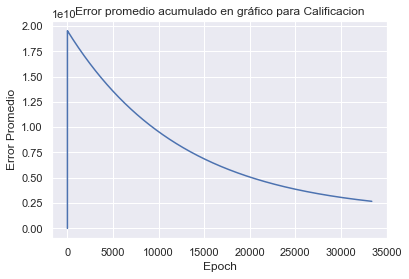

In [308]:
plt.plot(indicesCalifica, errorCalifica)
tituloCalificacion="Error promedio acumulado en gráfico para Calificacion"
plt.title(tituloCalificacion)
plt.xlabel("Epoch")
plt.ylabel("Error Promedio")
plt.show()

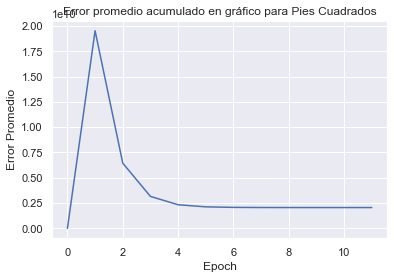

In [309]:
plt.plot(indicesSF, errorSF)
tituloCalificacion="Error promedio acumulado en gráfico para Pies Cuadrados"
plt.title(tituloCalificacion)
plt.xlabel("Epoch")
plt.ylabel("Error Promedio")
plt.show()

Evolución de los datos de entrenamiento en el modelo

[  0.         228.93769875 114.22857763 171.70351995 142.90572529
 157.3348414  150.10513597 153.727572   151.91254809 152.82196071
 152.3662958  152.59460228]


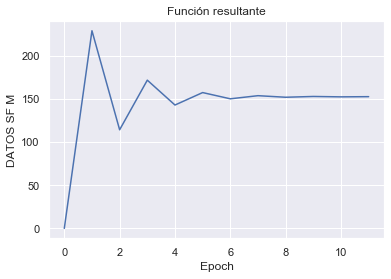

In [338]:
print(datosSF[:,0])
plt.plot(indicesSF, datosSF[:,0])
tituloCalificacion="Función resultante"
plt.title(tituloCalificacion)
plt.xlabel("Epoch")
plt.ylabel("DATOS SF M")
plt.show()

[0.         0.1809212  0.09567313 0.14378903 0.12508298 0.13985804
 0.13785741 0.14426223 0.1464555  0.15075896 0.15400511 0.15778103]


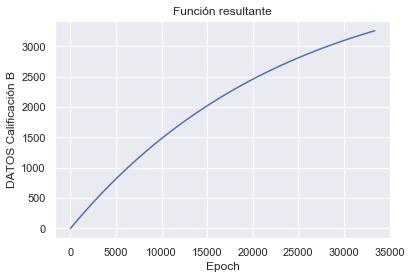

In [335]:
print(datosSF[:,1])
plt.plot(indicesCalifica, datosModeloCalifica[:,1])
tituloCalificacion="Función resultante"
plt.title(tituloCalificacion)
plt.xlabel("Epoch")
plt.ylabel("DATOS Calificación B")
plt.show()

[  0.         228.93769875 114.22857763 171.70351995 142.90572529
 157.3348414  150.10513597 153.727572   151.91254809 152.82196071
 152.3662958  152.59460228]


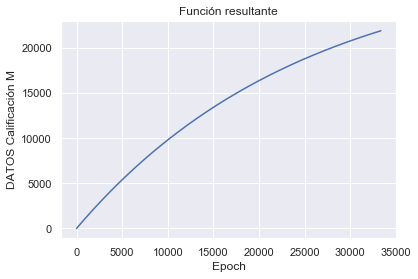

In [336]:
print(datosSF[:,0])
plt.plot(indicesCalifica, datosModeloCalifica[:,0])
tituloCalificacion="Función resultante"
plt.title(tituloCalificacion)
plt.xlabel("Epoch")
plt.ylabel("DATOS Calificación M")
plt.show()

[0.         0.1809212  0.09567313 0.14378903 0.12508298 0.13985804
 0.13785741 0.14426223 0.1464555  0.15075896 0.15400511 0.15778103]


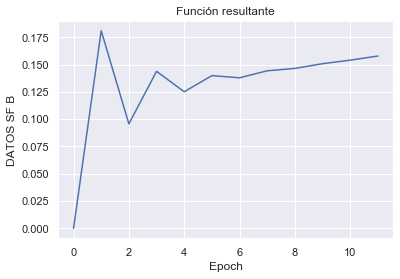

In [337]:
print(datosSF[:,1])
plt.plot(indicesSF, datosSF[:,1])
tituloCalificacion="Función resultante"
plt.title(tituloCalificacion)
plt.xlabel("Epoch")
plt.ylabel("DATOS SF B")
plt.show()